## Data Preprocessing

### 1. Import Dataset and relevant Python libraries

In [1]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
# Ensuring all rows and columns are visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:,.2f}'.format)

# Reading the data on which analysis needs to be done

df = pd.read_csv('analysis.csv')
df = df.iloc[:,1:]
df.head()

,Site_Level_Price_Index,CUSTOMER_ID,CUSTOMER_SITE_ID,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,TRX_DATE,TRX_AMT_USD,Margin,SALES_CHANNEL,QUANTITY,ORDER_TYPE,ORDER_NUM,PRODUCT_FAMILY,PRODUCT_MODEL,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Max_Case_Origin,Max_Case_Reason,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,Num_of_Inactive_Install_Bases,STRATEGIC_ACCOUNTS,TERRITORY_REGION,TRX_YEAR,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,Tenure,Cluster_Id,churn_prob_BGNBD,Churned_365,Churned_BGNBD
0,0.79,6482,24,GRAPHICS,60085,END USER,Industrial,S,None,144782380,2020-03-20,"1,855.74","1,381.20",Esker,6,STANDARD DOMESTIC,"512,254,720.00",LASER,FUME EXTRACTION,13.00,7.00,6.00,Call,81.00,1.97,unknown,unknown,5.00,0.00,0.00,No Contract,0.00,0,MW,2020,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,77.00,3,0.05,0,0
1,0.79,6482,24,GRAPHICS,60085,END USER,Industrial,S,None,144782380,2020-04-15,552.68,537.02,SFDC_CPQ,2,EQUIPMENT DOMESTIC,"512,260,527.00",LCM,INK,13.00,7.00,6.00,Call,81.00,1.97,unknown,unknown,5.00,0.00,0.00,No Contract,0.00,0,MW,2020,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,77.00,3,0.05,0,0
2,0.79,6482,24,GRAPHICS,60085,END USER,Industrial,S,None,144782380,2020-05-04,"5,000.00","4,843.37",Online,20,STANDARD DOMESTIC,"512,267,173.00",LCM,INK,13.00,7.00,6.00,Call,81.00,1.97,unknown,unknown,5.00,0.00,0.00,No Contract,0.00,0,MW,2020,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,77.00,3,0.05,0,0
3,0.79,6482,24,GRAPHICS,60085,END USER,Industrial,S,None,144782380,2020-05-11,"5,000.00","4,843.37",Copy,20,STANDARD DOMESTIC,"512,268,803.00",LCM,INK,13.00,7.00,6.00,Call,81.00,1.97,unknown,unknown,5.00,0.00,0.00,No Contract,0.00,0,MW,2020,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,77.00,3,0.05,0,0
4,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-01-03,213.80,129.59,EDI,20,EDI,"511,872,093.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0


In [2]:
df['Churned_BGNBD'].value_counts()

0    316089
1     64312
Name: Churned_BGNBD, dtype: int64

### 2. Divide dataset into different product dataframes

In [3]:
# set date columns to datetime 
df['TRX_DATE'] = pd.to_datetime(df['TRX_DATE'])

In [4]:
CIJ = df[df['PRODUCT_FAMILY'] == 'CIJ']
TTO = df[df['PRODUCT_FAMILY'] == 'TTO']
LCM = df[df['PRODUCT_FAMILY'] == 'LCM']
TIJ = df[df['PRODUCT_FAMILY'] == 'TIJ']

In [5]:
# set now to max transaction date + 1
from datetime import timedelta
NOW =  max(df.TRX_DATE) +  timedelta(days=1)

In [6]:
CIJ['TRX_DATE'] = pd.to_datetime(CIJ['TRX_DATE'])
TTO['TRX_DATE'] = pd.to_datetime(TTO['TRX_DATE'])
LCM['TRX_DATE'] = pd.to_datetime(LCM['TRX_DATE'])
TIJ['TRX_DATE'] = pd.to_datetime(TIJ['TRX_DATE'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

**CIJ_Final Creation**

In [7]:
CIJ.head()

,Site_Level_Price_Index,CUSTOMER_ID,CUSTOMER_SITE_ID,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,TRX_DATE,TRX_AMT_USD,Margin,SALES_CHANNEL,QUANTITY,ORDER_TYPE,ORDER_NUM,PRODUCT_FAMILY,PRODUCT_MODEL,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Max_Case_Origin,Max_Case_Reason,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,Num_of_Inactive_Install_Bases,STRATEGIC_ACCOUNTS,TERRITORY_REGION,TRX_YEAR,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,Tenure,Cluster_Id,churn_prob_BGNBD,Churned_365,Churned_BGNBD
4,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-01-03,213.80,129.59,EDI,20,EDI,"511,872,093.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0
5,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-09-01,222.40,138.19,EDI,20,EDI,"511,955,407.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0
6,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-08-29,66.72,41.46,Online,6,STANDARD DOMESTIC,"511,954,133.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0
7,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-08-29,44.48,27.64,Online,4,STANDARD DOMESTIC,"511,954,133.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0
8,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-05-26,33.36,20.73,BigMachine,3,EQUIPMENT DOMESTIC,"511,920,130.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0


In [14]:
# calculate CIJ recency
CIJvar = CIJ.groupby('CUSTOMER_SITE_ID').agg({'TRX_DATE': lambda x: (NOW - x.max()).days}).reset_index()
CIJvar['TRX_DATE'] = CIJvar['TRX_DATE'].astype(int)
CIJvar.rename(columns = {'TRX_DATE': 'CIJ_Recency'}, inplace = True)
CIJvar.head(10)

,CUSTOMER_SITE_ID,CIJ_Recency
0,90,50
1,111,415
2,114,6
3,141,80
4,158,78
5,247,17
6,287,64
7,352,294
8,367,15
9,380,37


In [15]:
CIJvar.shape

(6831, 2)

In [16]:
# calculate CIJ tenure
CIJvar1 = CIJ.groupby('CUSTOMER_SITE_ID').agg({'TRX_DATE': lambda x: (x.max()- x.min()).days + 1}).reset_index()
CIJvar1['TRX_DATE'] = CIJvar1['TRX_DATE'].astype(int)
CIJvar1.rename(columns = {'TRX_DATE': 'CIJ_Tenure'}, inplace = True)

In [17]:
CIJvar1.head()

,CUSTOMER_SITE_ID,CIJ_Tenure
0,90,1829
1,111,1457
2,114,1968
3,141,1883
4,158,1896


In [18]:
CIJvar1.shape

(6831, 2)

In [19]:
CIJvar2 = pd.merge(CIJvar,CIJvar1,on='CUSTOMER_SITE_ID')

In [20]:
CIJvar2.head()

,CUSTOMER_SITE_ID,CIJ_Recency,CIJ_Tenure
0,90,50,1829
1,111,415,1457
2,114,6,1968
3,141,80,1883
4,158,78,1896


In [21]:
CIJ_Final = pd.merge(CIJ, CIJvar2,on='CUSTOMER_SITE_ID')

In [22]:
CIJ_Final.head()

,Site_Level_Price_Index,CUSTOMER_ID,CUSTOMER_SITE_ID,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,TRX_DATE,TRX_AMT_USD,Margin,SALES_CHANNEL,QUANTITY,ORDER_TYPE,ORDER_NUM,PRODUCT_FAMILY,PRODUCT_MODEL,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Max_Case_Origin,Max_Case_Reason,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,Num_of_Inactive_Install_Bases,STRATEGIC_ACCOUNTS,TERRITORY_REGION,TRX_YEAR,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,Tenure,Cluster_Id,churn_prob_BGNBD,Churned_365,Churned_BGNBD,CIJ_Recency,CIJ_Tenure
0,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-01-03,213.80,129.59,EDI,20,EDI,"511,872,093.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0,50,1829
1,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-09-01,222.40,138.19,EDI,20,EDI,"511,955,407.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0,50,1829
2,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-08-29,66.72,41.46,Online,6,STANDARD DOMESTIC,"511,954,133.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0,50,1829
3,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-08-29,44.48,27.64,Online,4,STANDARD DOMESTIC,"511,954,133.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0,50,1829
4,1.40,37,90,CHEMICALS,65802,END USER,Industrial,S,None,43937895,2017-05-26,33.36,20.73,BigMachine,3,EQUIPMENT DOMESTIC,"511,920,130.00",CIJ,MAKE-UP,57.00,13.00,44.00,Call,53.00,3.03,unknown,unknown,6.00,6.00,"1,003.00",FSMA,0.00,0,MC,2017,50,18.86,98,233.90,172.39,11.37,CIJ,MAKE-UP,1,3,EDI,EDI,1.35,"1,879.00",3,0.02,0,0,50,1829


In [23]:
CIJ_Final[['CUSTOMER_SITE_ID','Tenure','CIJ_Tenure','Churned_365']].head()

,CUSTOMER_SITE_ID,Tenure,CIJ_Tenure,Churned_365
0,90,"1,879.00",1829,0
1,90,"1,879.00",1829,0
2,90,"1,879.00",1829,0
3,90,"1,879.00",1829,0
4,90,"1,879.00",1829,0


In [24]:
# update CIJ tenure
CIJ_Final.loc[CIJ_Final['Churned_BGNBD'] == 0,'New Tenure'] = CIJ_Final['CIJ_Recency'] + CIJ_Final['CIJ_Tenure']
CIJ_Final.loc[CIJ_Final['Churned_BGNBD'] == 1,'New Tenure'] = CIJ_Final['CIJ_Tenure']
CIJ_Final.drop('CIJ_Tenure',inplace=True,axis =1)
CIJ_Final.rename(columns = {'New Tenure':'CIJ_Tenure'}, inplace = True)

In [25]:
CIJ_Final[['CUSTOMER_SITE_ID','CIJ_Tenure','Tenure','Churned_BGNBD']].head()

,CUSTOMER_SITE_ID,CIJ_Tenure,Tenure,Churned_BGNBD
0,90,"1,879.00","1,879.00",0
1,90,"1,879.00","1,879.00",0
2,90,"1,879.00","1,879.00",0
3,90,"1,879.00","1,879.00",0
4,90,"1,879.00","1,879.00",0


In [31]:
CIJ_Final.shape

(314474, 56)

**TTO_Final Creation**

In [32]:
TTO.head()

,Site_Level_Price_Index,CUSTOMER_ID,CUSTOMER_SITE_ID,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,TRX_DATE,TRX_AMT_USD,Margin,SALES_CHANNEL,QUANTITY,ORDER_TYPE,ORDER_NUM,PRODUCT_FAMILY,PRODUCT_MODEL,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Max_Case_Origin,Max_Case_Reason,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,Num_of_Inactive_Install_Bases,STRATEGIC_ACCOUNTS,TERRITORY_REGION,TRX_YEAR,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,Tenure,Cluster_Id,churn_prob_BGNBD,Churned_365,Churned_BGNBD
181,0.73,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2019-08-07,"1,492.40","1,196.86",EDI,5,EDI,"512,186,579.00",TTO,RIBBONS,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2019,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0
183,0.73,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2019-03-01,596.96,478.74,EDI,2,EDI,"512,135,829.00",TTO,RIBBONS,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2019,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0
194,0.73,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2019-01-23,298.48,239.37,EDI,1,EDI,"512,122,913.00",TTO,RIBBONS,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2019,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0
203,0.74,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2020-03-25,"2,984.80","2,396.56",EDI,10,EDI,"512,256,620.00",TTO,RIBBONS,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2020,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0
296,2.19,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2015-07-21,235.41,169.06,BigMachine,1,EQUIPMENT DOMESTIC,"511,687,013.00",TTO,RIBBONS,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2015,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0


In [33]:
# calculate CIJ recency
TTOvar = TTO.groupby('CUSTOMER_SITE_ID').agg({'TRX_DATE': lambda x: (NOW - x.max()).days}).reset_index()
TTOvar['TRX_DATE'] = TTOvar['TRX_DATE'].astype(int)
TTOvar.rename(columns = {'TRX_DATE': 'TTO_Recency'}, inplace = True)
TTOvar.head(10)

,CUSTOMER_SITE_ID,TTO_Recency
0,114,71
1,946,71
2,948,23
3,1009,409
4,1313,742
5,1337,1590
6,1439,94
7,1529,51
8,1830,617
9,2371,806


In [34]:
TTOvar.shape

(1220, 2)

In [35]:
# calculate CIJ tenure
TTOvar1 = TTO.groupby('CUSTOMER_SITE_ID').agg({'TRX_DATE': lambda x: (x.max()- x.min()).days + 1}).reset_index()
TTOvar1['TRX_DATE'] = TTOvar1['TRX_DATE'].astype(int)
TTOvar1.rename(columns = {'TRX_DATE': 'TTO_Tenure'}, inplace = True)

In [36]:
TTOvar1.head()

,CUSTOMER_SITE_ID,TTO_Tenure
0,114,1710
1,946,433
2,948,1925
3,1009,246
4,1313,737


In [37]:
TTOvar1.shape

(1220, 2)

In [38]:
TTOvar2 = pd.merge(TTOvar,TTOvar1,on='CUSTOMER_SITE_ID')

In [39]:
TTOvar2.head()

,CUSTOMER_SITE_ID,TTO_Recency,TTO_Tenure
0,114,71,1710
1,946,71,433
2,948,23,1925
3,1009,409,246
4,1313,742,737


In [40]:
TTO_Final = pd.merge(TTO, TTOvar2,on='CUSTOMER_SITE_ID')

In [41]:
TTO_Final.head()

,Site_Level_Price_Index,CUSTOMER_ID,CUSTOMER_SITE_ID,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,TRX_DATE,TRX_AMT_USD,Margin,SALES_CHANNEL,QUANTITY,ORDER_TYPE,ORDER_NUM,PRODUCT_FAMILY,PRODUCT_MODEL,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Max_Case_Origin,Max_Case_Reason,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,Num_of_Inactive_Install_Bases,STRATEGIC_ACCOUNTS,TERRITORY_REGION,TRX_YEAR,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,Tenure,Cluster_Id,churn_prob_BGNBD,Churned_365,Churned_BGNBD,TTO_Recency,TTO_Tenure
0,0.73,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2019-08-07,"1,492.40","1,196.86",EDI,5,EDI,"512,186,579.00",TTO,RIBBONS,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2019,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0,71,1710
1,0.73,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2019-03-01,596.96,478.74,EDI,2,EDI,"512,135,829.00",TTO,RIBBONS,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2019,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0,71,1710
2,0.73,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2019-01-23,298.48,239.37,EDI,1,EDI,"512,122,913.00",TTO,RIBBONS,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2019,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0,71,1710
3,0.74,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2020-03-25,"2,984.80","2,396.56",EDI,10,EDI,"512,256,620.00",TTO,RIBBONS,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2020,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0,71,1710
4,2.19,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2015-07-21,235.41,169.06,BigMachine,1,EQUIPMENT DOMESTIC,"511,687,013.00",TTO,RIBBONS,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2015,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0,71,1710


In [42]:
TTO_Final[['CUSTOMER_SITE_ID','Tenure','TTO_Tenure','Churned_BGNBD']].head()

,CUSTOMER_SITE_ID,Tenure,TTO_Tenure,Churned_BGNBD
0,114,"1,974.00",1710,0
1,114,"1,974.00",1710,0
2,114,"1,974.00",1710,0
3,114,"1,974.00",1710,0
4,114,"1,974.00",1710,0


In [43]:
# update TTO tenure
TTO_Final.loc[TTO_Final['Churned_BGNBD'] == 0,'New Tenure'] = TTO_Final['TTO_Recency'] + TTO_Final['TTO_Tenure']
TTO_Final.loc[TTO_Final['Churned_BGNBD'] == 1,'New Tenure'] = TTO_Final['TTO_Tenure']
TTO_Final.drop('TTO_Tenure',inplace=True,axis =1)
TTO_Final.rename(columns = {'New Tenure':'TTO_Tenure'}, inplace = True)

In [44]:
TTO_Final[['CUSTOMER_SITE_ID','TTO_Tenure','Tenure','Churned_BGNBD']].head()

,CUSTOMER_SITE_ID,TTO_Tenure,Tenure,Churned_BGNBD
0,114,"1,781.00","1,974.00",0
1,114,"1,781.00","1,974.00",0
2,114,"1,781.00","1,974.00",0
3,114,"1,781.00","1,974.00",0
4,114,"1,781.00","1,974.00",0


In [45]:
TTO_Final = TTO_Final.reset_index()

In [46]:
TTO_Final[['CUSTOMER_SITE_ID','TTO_Tenure','Tenure','Churned_BGNBD']].head()

,CUSTOMER_SITE_ID,TTO_Tenure,Tenure,Churned_BGNBD
0,114,"1,781.00","1,974.00",0
1,114,"1,781.00","1,974.00",0
2,114,"1,781.00","1,974.00",0
3,114,"1,781.00","1,974.00",0
4,114,"1,781.00","1,974.00",0


In [47]:
TTO_Final.shape

(21202, 56)

**LCM_Final Creation**

In [48]:
LCM.head()

,Site_Level_Price_Index,CUSTOMER_ID,CUSTOMER_SITE_ID,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,TRX_DATE,TRX_AMT_USD,Margin,SALES_CHANNEL,QUANTITY,ORDER_TYPE,ORDER_NUM,PRODUCT_FAMILY,PRODUCT_MODEL,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Max_Case_Origin,Max_Case_Reason,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,Num_of_Inactive_Install_Bases,STRATEGIC_ACCOUNTS,TERRITORY_REGION,TRX_YEAR,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,Tenure,Cluster_Id,churn_prob_BGNBD,Churned_365,Churned_BGNBD
1,0.79,6482,24,GRAPHICS,60085,END USER,Industrial,S,None,144782380,2020-04-15,552.68,537.02,SFDC_CPQ,2,EQUIPMENT DOMESTIC,"512,260,527.00",LCM,INK,13.00,7.00,6.00,Call,81.00,1.97,unknown,unknown,5.00,0.00,0.00,No Contract,0.00,0,MW,2020,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,77.00,3,0.05,0,0
2,0.79,6482,24,GRAPHICS,60085,END USER,Industrial,S,None,144782380,2020-05-04,"5,000.00","4,843.37",Online,20,STANDARD DOMESTIC,"512,267,173.00",LCM,INK,13.00,7.00,6.00,Call,81.00,1.97,unknown,unknown,5.00,0.00,0.00,No Contract,0.00,0,MW,2020,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,77.00,3,0.05,0,0
3,0.79,6482,24,GRAPHICS,60085,END USER,Industrial,S,None,144782380,2020-05-11,"5,000.00","4,843.37",Copy,20,STANDARD DOMESTIC,"512,268,803.00",LCM,INK,13.00,7.00,6.00,Call,81.00,1.97,unknown,unknown,5.00,0.00,0.00,No Contract,0.00,0,MW,2020,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,77.00,3,0.05,0,0
877,0.86,125,367,BEVERAGE,12302,END USER,Industrial,XL,Over Stocked / Timing,37366788,2015-05-22,782.12,754.50,Online,4,STANDARD DOMESTIC,"511,570,308.00",LCM,INK,154.00,26.00,128.00,Call,123.00,1.00,TS Survey Followup,CX: Tech Support,34.00,42.00,"1,266.79",FSMA,10.00,0,NE,2015,15,8.97,218,873.03,673.77,37.66,CIJ,MAKE-UP,3,5,Online,STANDARD DOMESTIC,1.00,"1,961.00",3,0.00,0,0
878,0.86,125,367,BEVERAGE,12302,END USER,Industrial,XL,Over Stocked / Timing,37366788,2015-02-23,782.12,754.50,Online,4,STANDARD DOMESTIC,"511,570,308.00",LCM,INK,154.00,26.00,128.00,Call,123.00,1.00,TS Survey Followup,CX: Tech Support,34.00,42.00,"1,266.79",FSMA,10.00,0,NE,2015,15,8.97,218,873.03,673.77,37.66,CIJ,MAKE-UP,3,5,Online,STANDARD DOMESTIC,1.00,"1,961.00",3,0.00,0,0


In [49]:
# calculate CIJ recency
LCMvar = LCM.groupby('CUSTOMER_SITE_ID').agg({'TRX_DATE': lambda x: (NOW - x.max()).days}).reset_index()
LCMvar['TRX_DATE'] = LCMvar['TRX_DATE'].astype(int)
LCMvar.rename(columns = {'TRX_DATE': 'LCM_Recency'}, inplace = True)
LCMvar.head(10)

,CUSTOMER_SITE_ID,LCM_Recency
0,24,24
1,367,1749
2,425,147
3,426,1168
4,456,1536
5,481,854
6,682,15
7,905,37
8,946,238
9,980,902


In [50]:
LCMvar.shape

(1486, 2)

In [51]:
# calculate LCM tenure
LCMvar1 = LCM.groupby('CUSTOMER_SITE_ID').agg({'TRX_DATE': lambda x: (x.max()- x.min()).days + 1}).reset_index()
LCMvar1['TRX_DATE'] = LCMvar1['TRX_DATE'].astype(int)
LCMvar1.rename(columns = {'TRX_DATE': 'LCM_Tenure'}, inplace = True)

In [52]:
LCMvar1.head()

,CUSTOMER_SITE_ID,LCM_Tenure
0,24,27
1,367,212
2,425,1278
3,426,1
4,456,405


In [53]:
LCMvar1.shape

(1486, 2)

In [54]:
LCMvar2 = pd.merge(LCMvar,LCMvar1,on='CUSTOMER_SITE_ID')

In [55]:
LCMvar2.head()

,CUSTOMER_SITE_ID,LCM_Recency,LCM_Tenure
0,24,24,27
1,367,1749,212
2,425,147,1278
3,426,1168,1
4,456,1536,405


In [56]:
LCM_Final = pd.merge(LCM, LCMvar2,on='CUSTOMER_SITE_ID')

In [57]:
LCM_Final.head()

,Site_Level_Price_Index,CUSTOMER_ID,CUSTOMER_SITE_ID,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,TRX_DATE,TRX_AMT_USD,Margin,SALES_CHANNEL,QUANTITY,ORDER_TYPE,ORDER_NUM,PRODUCT_FAMILY,PRODUCT_MODEL,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Max_Case_Origin,Max_Case_Reason,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,Num_of_Inactive_Install_Bases,STRATEGIC_ACCOUNTS,TERRITORY_REGION,TRX_YEAR,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,Tenure,Cluster_Id,churn_prob_BGNBD,Churned_365,Churned_BGNBD,LCM_Recency,LCM_Tenure
0,0.79,6482,24,GRAPHICS,60085,END USER,Industrial,S,None,144782380,2020-04-15,552.68,537.02,SFDC_CPQ,2,EQUIPMENT DOMESTIC,"512,260,527.00",LCM,INK,13.00,7.00,6.00,Call,81.00,1.97,unknown,unknown,5.00,0.00,0.00,No Contract,0.00,0,MW,2020,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,77.00,3,0.05,0,0,24,27
1,0.79,6482,24,GRAPHICS,60085,END USER,Industrial,S,None,144782380,2020-05-04,"5,000.00","4,843.37",Online,20,STANDARD DOMESTIC,"512,267,173.00",LCM,INK,13.00,7.00,6.00,Call,81.00,1.97,unknown,unknown,5.00,0.00,0.00,No Contract,0.00,0,MW,2020,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,77.00,3,0.05,0,0,24,27
2,0.79,6482,24,GRAPHICS,60085,END USER,Industrial,S,None,144782380,2020-05-11,"5,000.00","4,843.37",Copy,20,STANDARD DOMESTIC,"512,268,803.00",LCM,INK,13.00,7.00,6.00,Call,81.00,1.97,unknown,unknown,5.00,0.00,0.00,No Contract,0.00,0,MW,2020,24,17.67,4,"3,102.11","2,901.24",12.00,LCM,INK,2,2,Copy,STANDARD DOMESTIC,0.79,77.00,3,0.05,0,0,24,27
3,0.86,125,367,BEVERAGE,12302,END USER,Industrial,XL,Over Stocked / Timing,37366788,2015-05-22,782.12,754.50,Online,4,STANDARD DOMESTIC,"511,570,308.00",LCM,INK,154.00,26.00,128.00,Call,123.00,1.00,TS Survey Followup,CX: Tech Support,34.00,42.00,"1,266.79",FSMA,10.00,0,NE,2015,15,8.97,218,873.03,673.77,37.66,CIJ,MAKE-UP,3,5,Online,STANDARD DOMESTIC,1.00,"1,961.00",3,0.00,0,0,1749,212
4,0.86,125,367,BEVERAGE,12302,END USER,Industrial,XL,Over Stocked / Timing,37366788,2015-02-23,782.12,754.50,Online,4,STANDARD DOMESTIC,"511,570,308.00",LCM,INK,154.00,26.00,128.00,Call,123.00,1.00,TS Survey Followup,CX: Tech Support,34.00,42.00,"1,266.79",FSMA,10.00,0,NE,2015,15,8.97,218,873.03,673.77,37.66,CIJ,MAKE-UP,3,5,Online,STANDARD DOMESTIC,1.00,"1,961.00",3,0.00,0,0,1749,212


In [58]:
LCM_Final[['CUSTOMER_SITE_ID','Tenure','LCM_Tenure','Churned_BGNBD']].head()

,CUSTOMER_SITE_ID,Tenure,LCM_Tenure,Churned_BGNBD
0,24,77.00,27,0
1,24,77.00,27,0
2,24,77.00,27,0
3,367,"1,961.00",212,0
4,367,"1,961.00",212,0


In [59]:
# update CIJ tenure
LCM_Final.loc[LCM_Final['Churned_BGNBD'] == 0,'New Tenure'] = LCM_Final['LCM_Recency'] + LCM_Final['LCM_Tenure']
LCM_Final.loc[LCM_Final['Churned_BGNBD'] == 1,'New Tenure'] = LCM_Final['LCM_Tenure']
LCM_Final.drop('LCM_Tenure',inplace=True,axis =1)
LCM_Final.rename(columns = {'New Tenure':'LCM_Tenure'}, inplace = True)

In [60]:
LCM_Final[['CUSTOMER_SITE_ID','LCM_Tenure','Tenure','Churned_BGNBD']].head()

,CUSTOMER_SITE_ID,LCM_Tenure,Tenure,Churned_BGNBD
0,24,51.00,77.00,0
1,24,51.00,77.00,0
2,24,51.00,77.00,0
3,367,"1,961.00","1,961.00",0
4,367,"1,961.00","1,961.00",0


In [61]:
LCM_Final = LCM_Final.reset_index()

In [62]:
LCM_Final[['CUSTOMER_SITE_ID','LCM_Tenure','Tenure','Churned_BGNBD']].head()

,CUSTOMER_SITE_ID,LCM_Tenure,Tenure,Churned_BGNBD
0,24,51.00,77.00,0
1,24,51.00,77.00,0
2,24,51.00,77.00,0
3,367,"1,961.00","1,961.00",0
4,367,"1,961.00","1,961.00",0


In [63]:
LCM_Final.shape

(26654, 56)

**TIJ_Final Creation**

In [64]:
TIJ.head()

,Site_Level_Price_Index,CUSTOMER_ID,CUSTOMER_SITE_ID,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,TRX_DATE,TRX_AMT_USD,Margin,SALES_CHANNEL,QUANTITY,ORDER_TYPE,ORDER_NUM,PRODUCT_FAMILY,PRODUCT_MODEL,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Max_Case_Origin,Max_Case_Reason,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,Num_of_Inactive_Install_Bases,STRATEGIC_ACCOUNTS,TERRITORY_REGION,TRX_YEAR,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,Tenure,Cluster_Id,churn_prob_BGNBD,Churned_365,Churned_BGNBD
212,0.80,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2017-09-07,246.57,146.87,EDI,3,EDI,"511,957,157.00",TIJ,INK,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2017,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0
213,0.80,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2017-04-12,209.58,109.88,BigMachine,3,EQUIPMENT DOMESTIC,"511,904,741.00",TIJ,INK,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2017,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0
297,0.75,37,126,PHARMA & MEDICAL,8822,END USER,Industrial,S,Over Stocked / Timing,36781508,2017-03-29,823.20,575.52,EDI,8,EDI,"511,900,892.00",TIJ,INK,1.00,0.00,1.00,Call,13.00,1.00,Phone,Customer Experience,2.00,0.00,0.00,No Contract,0.00,0,NE,2017,49,61.94,19,835.78,605.25,8.84,TIJ,INK,1,1,EDI,EDI,0.75,"1,164.00",2,0.01,0,0
298,0.75,37,126,PHARMA & MEDICAL,8822,END USER,Industrial,S,Over Stocked / Timing,36781508,2017-08-17,"1,029.00",719.40,Online,10,STANDARD DOMESTIC,"511,945,707.00",TIJ,INK,1.00,0.00,1.00,Call,13.00,1.00,Phone,Customer Experience,2.00,0.00,0.00,No Contract,0.00,0,NE,2017,49,61.94,19,835.78,605.25,8.84,TIJ,INK,1,1,EDI,EDI,0.75,"1,164.00",2,0.01,0,0
299,0.75,37,126,PHARMA & MEDICAL,8822,END USER,Industrial,S,Over Stocked / Timing,36781508,2017-06-23,926.10,647.46,Online,9,STANDARD DOMESTIC,"511,930,964.00",TIJ,INK,1.00,0.00,1.00,Call,13.00,1.00,Phone,Customer Experience,2.00,0.00,0.00,No Contract,0.00,0,NE,2017,49,61.94,19,835.78,605.25,8.84,TIJ,INK,1,1,EDI,EDI,0.75,"1,164.00",2,0.01,0,0


In [65]:
# calculate TIJ recency
TIJvar = TIJ.groupby('CUSTOMER_SITE_ID').agg({'TRX_DATE': lambda x: (NOW - x.max()).days}).reset_index()
TIJvar['TRX_DATE'] = TIJvar['TRX_DATE'].astype(int)
TIJvar.rename(columns = {'TRX_DATE': 'TIJ_Recency'}, inplace = True)
TIJvar.head(10)

,CUSTOMER_SITE_ID,TIJ_Recency
0,114,1001
1,126,49
2,335,1952
3,352,195
4,425,237
5,426,295
6,427,465
7,441,16
8,487,440
9,673,870


In [66]:
TIJvar.shape

(509, 2)

In [67]:
# calculate TIJ tenure
TIJvar1 = TIJ.groupby('CUSTOMER_SITE_ID').agg({'TRX_DATE': lambda x: (x.max()- x.min()).days + 1}).reset_index()
TIJvar1['TRX_DATE'] = TIJvar1['TRX_DATE'].astype(int)
TIJvar1.rename(columns = {'TRX_DATE': 'TIJ_Tenure'}, inplace = True)

In [68]:
TIJvar1.head()

,CUSTOMER_SITE_ID,TIJ_Tenure
0,114,149
1,126,1115
2,335,29
3,352,920
4,425,1541


In [69]:
TIJvar1.shape

(509, 2)

In [70]:
TIJvar2 = pd.merge(TIJvar,TIJvar1,on='CUSTOMER_SITE_ID')

In [71]:
TIJvar2.head()

,CUSTOMER_SITE_ID,TIJ_Recency,TIJ_Tenure
0,114,1001,149
1,126,49,1115
2,335,1952,29
3,352,195,920
4,425,237,1541


In [72]:
TIJ_Final = pd.merge(TIJ, TIJvar2,on='CUSTOMER_SITE_ID')

In [73]:
TIJ_Final.shape

(6027, 55)

In [74]:
TIJ_Final.head()

,Site_Level_Price_Index,CUSTOMER_ID,CUSTOMER_SITE_ID,SHORT_VERTICAL,POSTAL_CODE,CUSTOMER_CLASS,TERRITORY_TYPE,SUPPLIES_SEGMENTATION,SUPPLIES_DECLINE_REASONS,DUNS_NUMBER,TRX_DATE,TRX_AMT_USD,Margin,SALES_CHANNEL,QUANTITY,ORDER_TYPE,ORDER_NUM,PRODUCT_FAMILY,PRODUCT_MODEL,Total_SVC_Incidents,Total_Repeat_Calls,Total_FTF_Calls,Most_Frequent_Interaction_Type,Total_Visits,Total_Cases,Max_Case_Origin,Max_Case_Reason,Num_of_Active_Install_Bases,Total_Contracts,Contract_length,Contract_Category,Num_of_Inactive_Install_Bases,STRATEGIC_ACCOUNTS,TERRITORY_REGION,TRX_YEAR,Recency,Frequency,Num_of_Trxns,Avg_Trxn_Amt,Avg_Margin,Avg_Quantity,Mode_of_Product_Family,Mode_of_Product_Model,Types_of_Product_Family,Types_of_Product_Model,Most_Frequent_Sales_Channel,Most_Frequent_Order_Type,Avg_Price_Index,Tenure,Cluster_Id,churn_prob_BGNBD,Churned_365,Churned_BGNBD,TIJ_Recency,TIJ_Tenure
0,0.80,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2017-09-07,246.57,146.87,EDI,3,EDI,"511,957,157.00",TIJ,INK,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2017,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0,1001,149
1,0.80,37,114,PHARMA & MEDICAL,92614,END USER,Industrial,M,None,84160407,2017-04-12,209.58,109.88,BigMachine,3,EQUIPMENT DOMESTIC,"511,904,741.00",TIJ,INK,57.00,14.00,43.00,Call,70.00,1.00,Email - VTI NACC,Customer Experience,15.00,11.00,521.64,FSMA,0.00,0,NW,2017,6,11.38,174,145.43,103.28,4.43,CIJ,MAKE-UP,3,4,EDI,EDI,1.25,"1,974.00",3,0.00,0,0,1001,149
2,0.75,37,126,PHARMA & MEDICAL,8822,END USER,Industrial,S,Over Stocked / Timing,36781508,2017-03-29,823.20,575.52,EDI,8,EDI,"511,900,892.00",TIJ,INK,1.00,0.00,1.00,Call,13.00,1.00,Phone,Customer Experience,2.00,0.00,0.00,No Contract,0.00,0,NE,2017,49,61.94,19,835.78,605.25,8.84,TIJ,INK,1,1,EDI,EDI,0.75,"1,164.00",2,0.01,0,0,49,1115
3,0.75,37,126,PHARMA & MEDICAL,8822,END USER,Industrial,S,Over Stocked / Timing,36781508,2017-08-17,"1,029.00",719.40,Online,10,STANDARD DOMESTIC,"511,945,707.00",TIJ,INK,1.00,0.00,1.00,Call,13.00,1.00,Phone,Customer Experience,2.00,0.00,0.00,No Contract,0.00,0,NE,2017,49,61.94,19,835.78,605.25,8.84,TIJ,INK,1,1,EDI,EDI,0.75,"1,164.00",2,0.01,0,0,49,1115
4,0.75,37,126,PHARMA & MEDICAL,8822,END USER,Industrial,S,Over Stocked / Timing,36781508,2017-06-23,926.10,647.46,Online,9,STANDARD DOMESTIC,"511,930,964.00",TIJ,INK,1.00,0.00,1.00,Call,13.00,1.00,Phone,Customer Experience,2.00,0.00,0.00,No Contract,0.00,0,NE,2017,49,61.94,19,835.78,605.25,8.84,TIJ,INK,1,1,EDI,EDI,0.75,"1,164.00",2,0.01,0,0,49,1115


In [75]:
TIJ_Final[['CUSTOMER_SITE_ID','Tenure','TIJ_Tenure','Churned_BGNBD','TIJ_Recency']].head()

,CUSTOMER_SITE_ID,Tenure,TIJ_Tenure,Churned_BGNBD,TIJ_Recency
0,114,"1,974.00",149,0,1001
1,114,"1,974.00",149,0,1001
2,126,"1,164.00",1115,0,49
3,126,"1,164.00",1115,0,49
4,126,"1,164.00",1115,0,49


In [76]:
# update TIJ tenure
TIJ_Final.loc[TIJ_Final['Churned_BGNBD'] == 0,'New Tenure'] = TIJ_Final['TIJ_Recency'] + TIJ_Final['TIJ_Tenure']
TIJ_Final.loc[TIJ_Final['Churned_BGNBD'] == 1,'New Tenure'] = TIJ_Final['TIJ_Tenure']
TIJ_Final.drop('TIJ_Tenure',inplace=True,axis =1)
TIJ_Final.rename(columns = {'New Tenure':'TIJ_Tenure'}, inplace = True)

In [77]:
TIJ_Final[['CUSTOMER_SITE_ID','TIJ_Tenure','Tenure','Churned_BGNBD']].head()

,CUSTOMER_SITE_ID,TIJ_Tenure,Tenure,Churned_BGNBD
0,114,"1,150.00","1,974.00",0
1,114,"1,150.00","1,974.00",0
2,126,"1,164.00","1,164.00",0
3,126,"1,164.00","1,164.00",0
4,126,"1,164.00","1,164.00",0


In [78]:
TIJ_Final = TIJ_Final.reset_index()

In [79]:
TIJ_Final[['CUSTOMER_SITE_ID','TIJ_Tenure','Tenure','Churned_BGNBD']].head()

,CUSTOMER_SITE_ID,TIJ_Tenure,Tenure,Churned_BGNBD
0,114,"1,150.00","1,974.00",0
1,114,"1,150.00","1,974.00",0
2,126,"1,164.00","1,164.00",0
3,126,"1,164.00","1,164.00",0
4,126,"1,164.00","1,164.00",0


In [80]:
TIJ_Final.shape

(6027, 56)

# SHORT VERTICAL

## CIJ

In [82]:
CIJ_Final_SV = CIJ_Final[CIJ_Final['SHORT_VERTICAL'] != 'UNKNOWN']

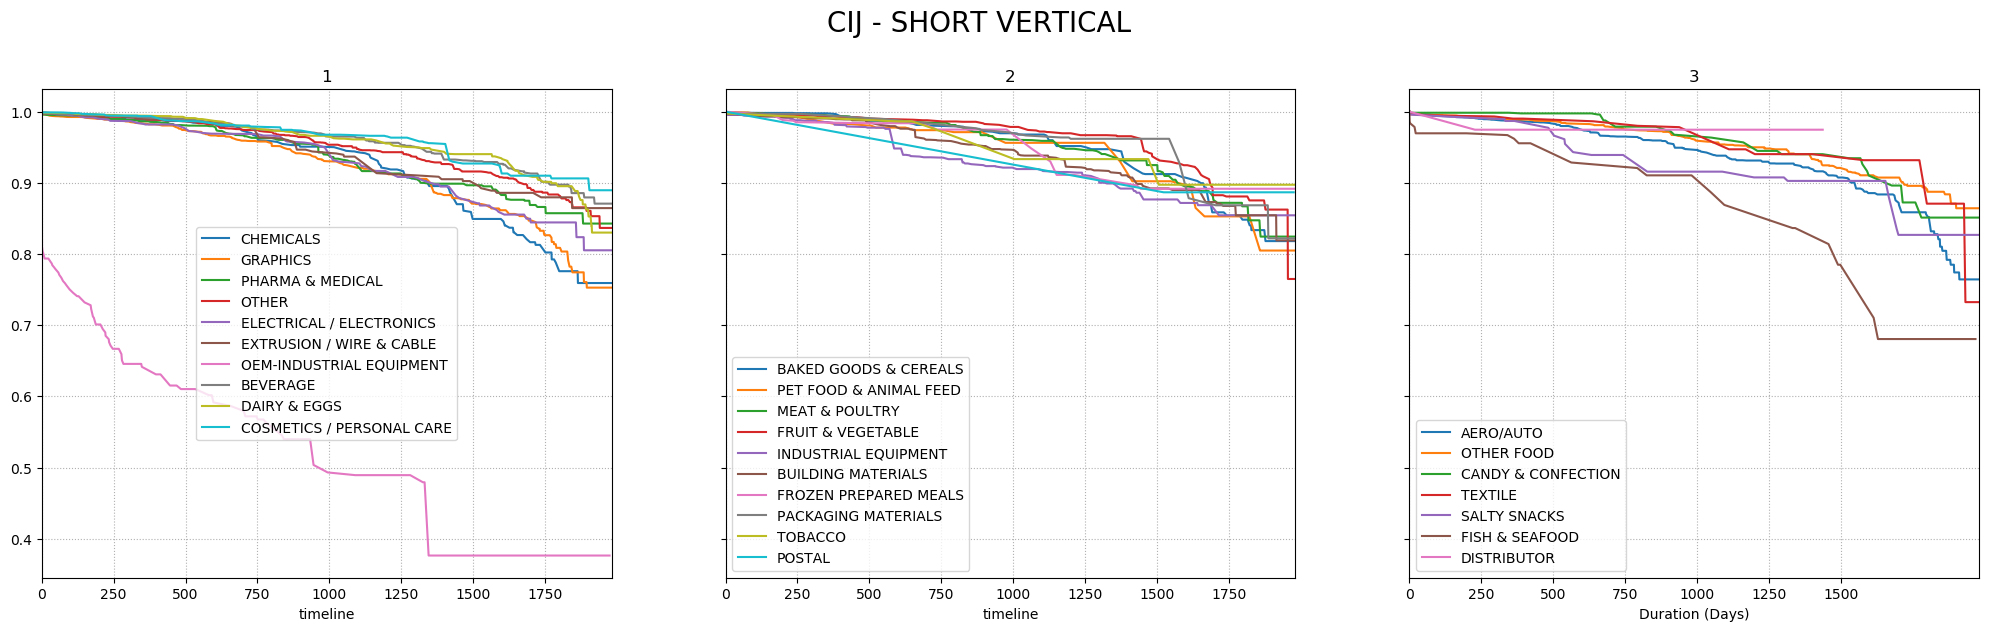

In [86]:
kmf1 = KaplanMeierFitter()

plt.figure(figsize = (25,20))
duration = CIJ_Final_SV['CIJ_Tenure']
observed = CIJ_Final_SV['Churned_BGNBD']

# Set the order that the positions will be plotted
positions_1 = ['CHEMICALS', 'GRAPHICS', 'PHARMA & MEDICAL', 'OTHER',
       'ELECTRICAL / ELECTRONICS', 'EXTRUSION / WIRE & CABLE',
       'OEM-INDUSTRIAL EQUIPMENT', 'BEVERAGE', 'DAIRY & EGGS',
       'COSMETICS / PERSONAL CARE']
positions_2 = ['BAKED GOODS & CEREALS', 'PET FOOD & ANIMAL FEED',
       'MEAT & POULTRY', 'FRUIT & VEGETABLE', 'INDUSTRIAL EQUIPMENT',
       'BUILDING MATERIALS', 'FROZEN PREPARED MEALS',
       'PACKAGING MATERIALS', 'TOBACCO', 'POSTAL']
positions_3 = ['AERO/AUTO', 'OTHER FOOD', 'CANDY & CONFECTION', 'TEXTILE', 'SALTY SNACKS', 'FISH & SEAFOOD',
               'DISTRIBUTOR']

ax1 = plt.subplot(331)
ax2 = plt.subplot(332, sharey = ax1)
ax3 = plt.subplot(333,sharey = ax1)
ax1.title.set_text('1')
ax2.title.set_text('2')
ax3.title.set_text('3')


for pos in positions_1:
    
    idx = CIJ_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax1)
    ax1.grid(linestyle='dotted')
    ax1.legend()

    
for pos in positions_2:
    
    idx = CIJ_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax2)
    ax2.grid(linestyle='dotted')
    ax2.legend()

for pos in positions_3:
    
    idx = CIJ_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax3)
    ax3.grid(linestyle='dotted')
    ax3.legend()
 

plt.suptitle('CIJ - SHORT VERTICAL', fontsize = 20)
plt.subplots_adjust(top=0.94)
plt.xticks(np.arange(0,1750,250))
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.style.use('default')
plt.savefig('CIJ SHORT VERTICAL.png',dpi = 100)
plt.show()

## TTO

In [87]:
TTO_Final_SV = TTO_Final[TTO_Final['SHORT_VERTICAL'] != 'UNKNOWN']

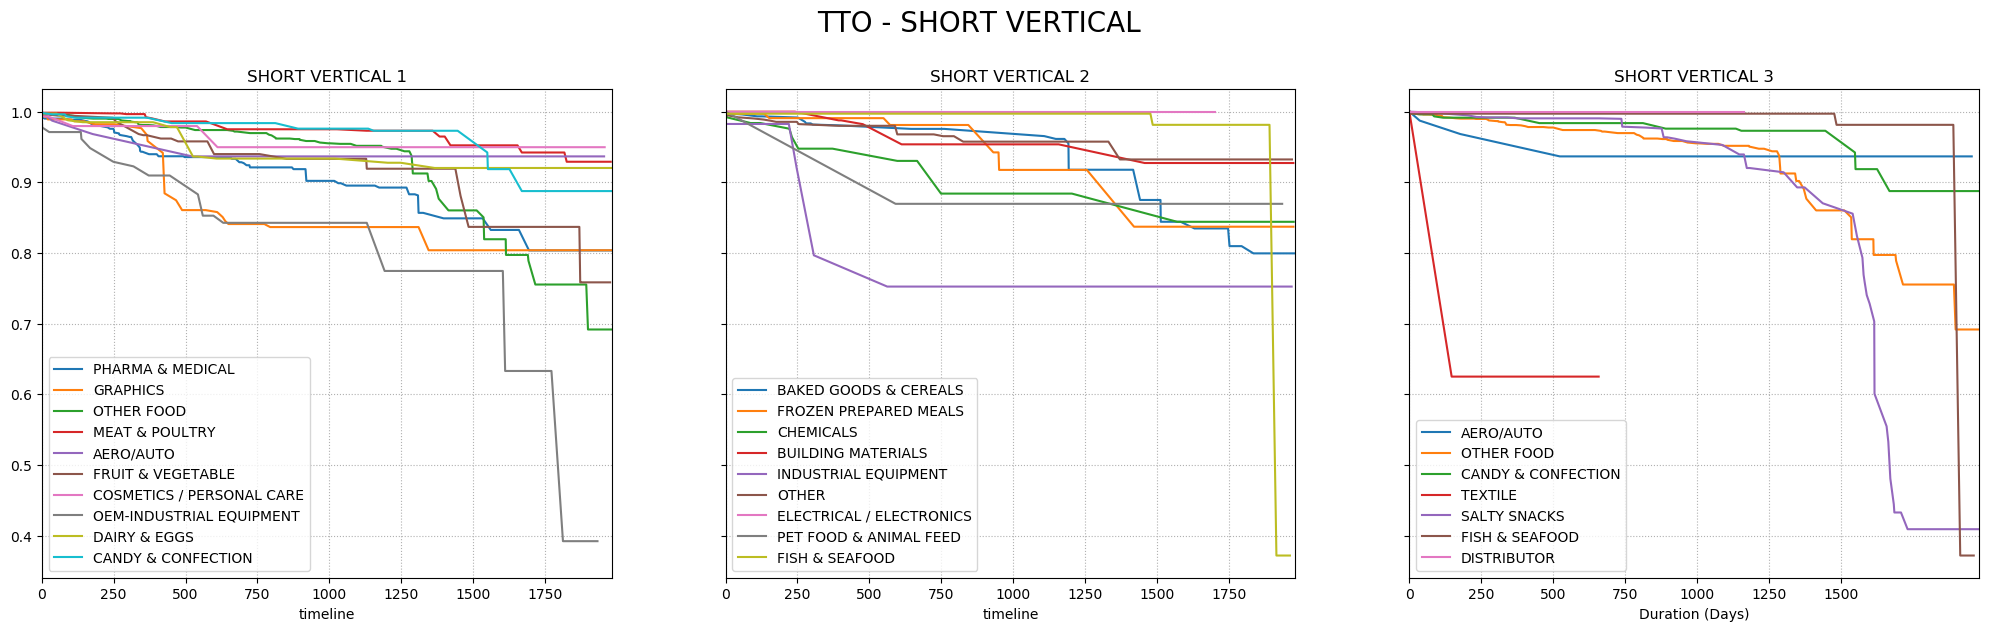

In [92]:
kmf1 = KaplanMeierFitter()

plt.figure(figsize = (25,20))
duration = TTO_Final_SV['TTO_Tenure']
observed = TTO_Final_SV['Churned_BGNBD']

# Set the order that the positions will be plotted
positions_1 = ['PHARMA & MEDICAL', 'GRAPHICS', 'OTHER FOOD',
       'MEAT & POULTRY', 'AERO/AUTO', 'FRUIT & VEGETABLE',
       'COSMETICS / PERSONAL CARE', 'OEM-INDUSTRIAL EQUIPMENT',
       'DAIRY & EGGS', 'CANDY & CONFECTION']

positions_2 = ['BAKED GOODS & CEREALS',
       'FROZEN PREPARED MEALS', 'CHEMICALS', 'BUILDING MATERIALS',
       'INDUSTRIAL EQUIPMENT', 'OTHER', 'ELECTRICAL / ELECTRONICS',
       'PET FOOD & ANIMAL FEED', 'FISH & SEAFOOD']

position_3 = ['EXTRUSION / WIRE & CABLE', 'TEXTILE', 'TOBACCO', 'BEVERAGE',
       'PACKAGING MATERIALS', 'DISTRIBUTOR']

ax1 = plt.subplot(331)
ax2 = plt.subplot(332, sharey = ax1)
ax3 = plt.subplot(333,sharey = ax1)
ax1.title.set_text('SHORT VERTICAL 1')
ax2.title.set_text('SHORT VERTICAL 2')
ax3.title.set_text('SHORT VERTICAL 3')


for pos in positions_1:
    
    idx = TTO_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax1)
    ax1.grid(linestyle='dotted')
    ax1.legend()
    

    

for pos in positions_2:
    
    idx = TTO_Final_SV['SHORT_VERTICAL'] == pos

    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax2)
    ax2.grid(linestyle='dotted')
    ax2.legend()
    


for pos in positions_3:

    idx = TTO_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax3)
    ax3.grid(linestyle='dotted')
    ax3.legend()
    


plt.suptitle('TTO - SHORT VERTICAL', fontsize = 20)
plt.subplots_adjust(top=0.94)
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.style.use('default')
plt.xticks(np.arange(0,1750,250))
plt.savefig('TTO SHORT VERTICAL.png', dpi=100)
plt.show()

## LCM

In [93]:
LCM_Final_SV = LCM_Final[LCM_Final['SHORT_VERTICAL'] != 'UNKNOWN']

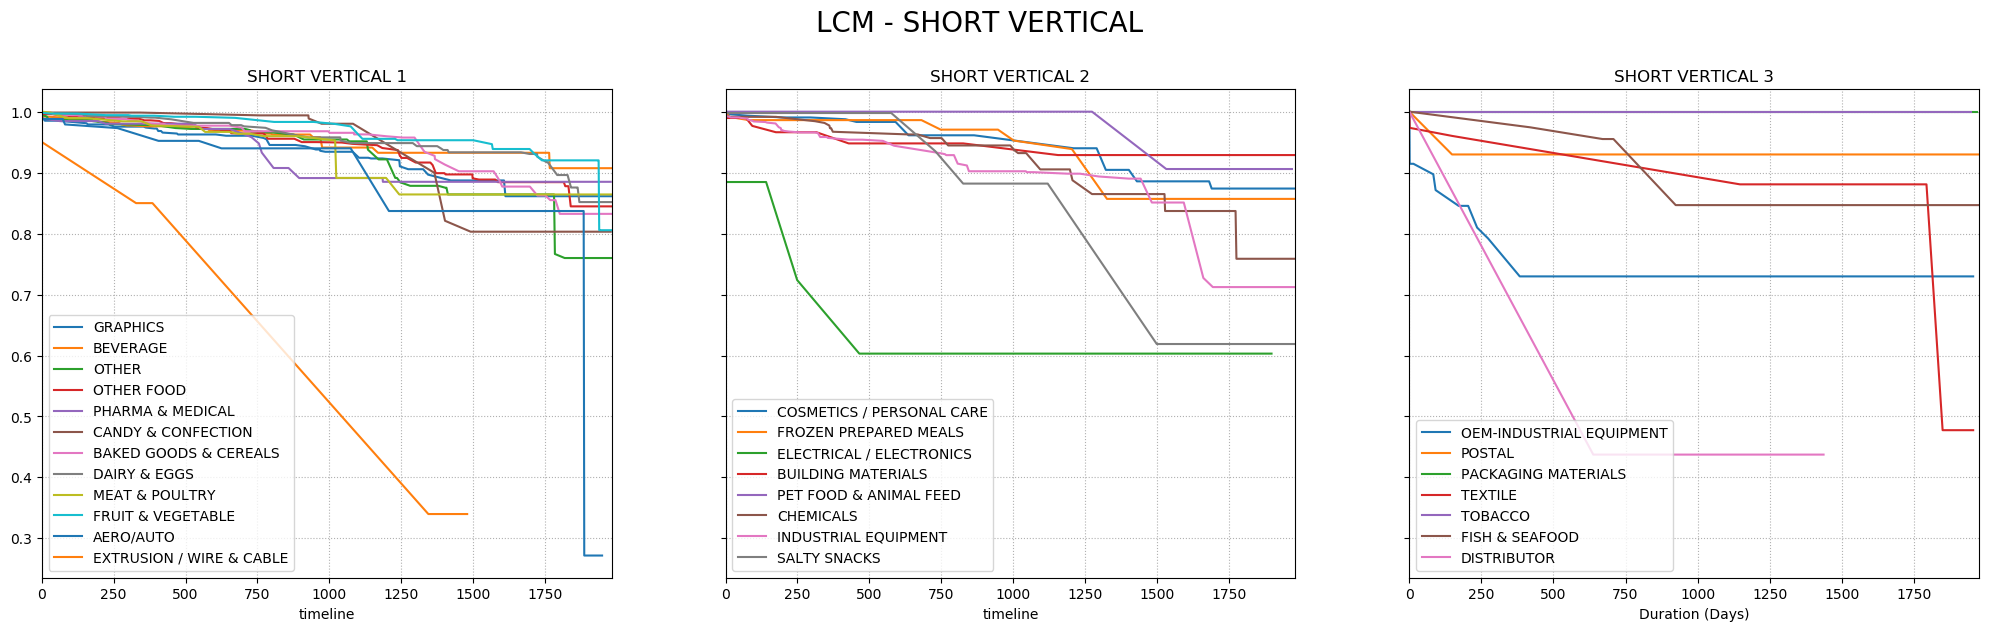

In [95]:
kmf1 = KaplanMeierFitter()

plt.figure(figsize = (25,20))
duration = LCM_Final_SV['LCM_Tenure']
observed = LCM_Final_SV['Churned_BGNBD']



# Set the order that the positions will be plotted
positions_1 = ['GRAPHICS', 'BEVERAGE', 'OTHER', 'OTHER FOOD', 'PHARMA & MEDICAL',
       'CANDY & CONFECTION', 'BAKED GOODS & CEREALS', 'DAIRY & EGGS',
       'MEAT & POULTRY', 'FRUIT & VEGETABLE', 'AERO/AUTO',
       'EXTRUSION / WIRE & CABLE']

positions_2 = ['COSMETICS / PERSONAL CARE',
       'FROZEN PREPARED MEALS', 'ELECTRICAL / ELECTRONICS',
       'BUILDING MATERIALS', 'PET FOOD & ANIMAL FEED', 'CHEMICALS',
       'INDUSTRIAL EQUIPMENT', 'SALTY SNACKS']

positions_3 = ['OEM-INDUSTRIAL EQUIPMENT',
       'POSTAL', 'PACKAGING MATERIALS', 'TEXTILE', 'TOBACCO',
       'FISH & SEAFOOD', 'DISTRIBUTOR']

ax1 = plt.subplot(331)
ax2 = plt.subplot(332, sharey = ax1)
ax3 = plt.subplot(333,sharey = ax1)
ax1.title.set_text('SHORT VERTICAL 1')
ax2.title.set_text('SHORT VERTICAL 2')
ax3.title.set_text('SHORT VERTICAL 3')


for pos in positions_1:
    
    idx = LCM_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax1)
    ax1.legend()
    ax1.grid(linestyle='dotted')

    

for pos in positions_2:
    
    idx = LCM_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax2)
    ax2.legend()
    ax2.grid(linestyle='dotted')


for pos in positions_3:

    idx = LCM_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax3)
    ax3.legend()
    ax3.grid(linestyle='dotted')




plt.suptitle('LCM - SHORT VERTICAL', fontsize = 20)
plt.subplots_adjust(top=0.94)
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')

plt.style.use('default')
plt.savefig('LCM SHORT VERTICAL.png', dpi=100)
plt.show()

## TIJ

In [96]:
TIJ_Final_SV = TIJ_Final[TIJ_Final['SHORT_VERTICAL'] != 'UNKNOWN']

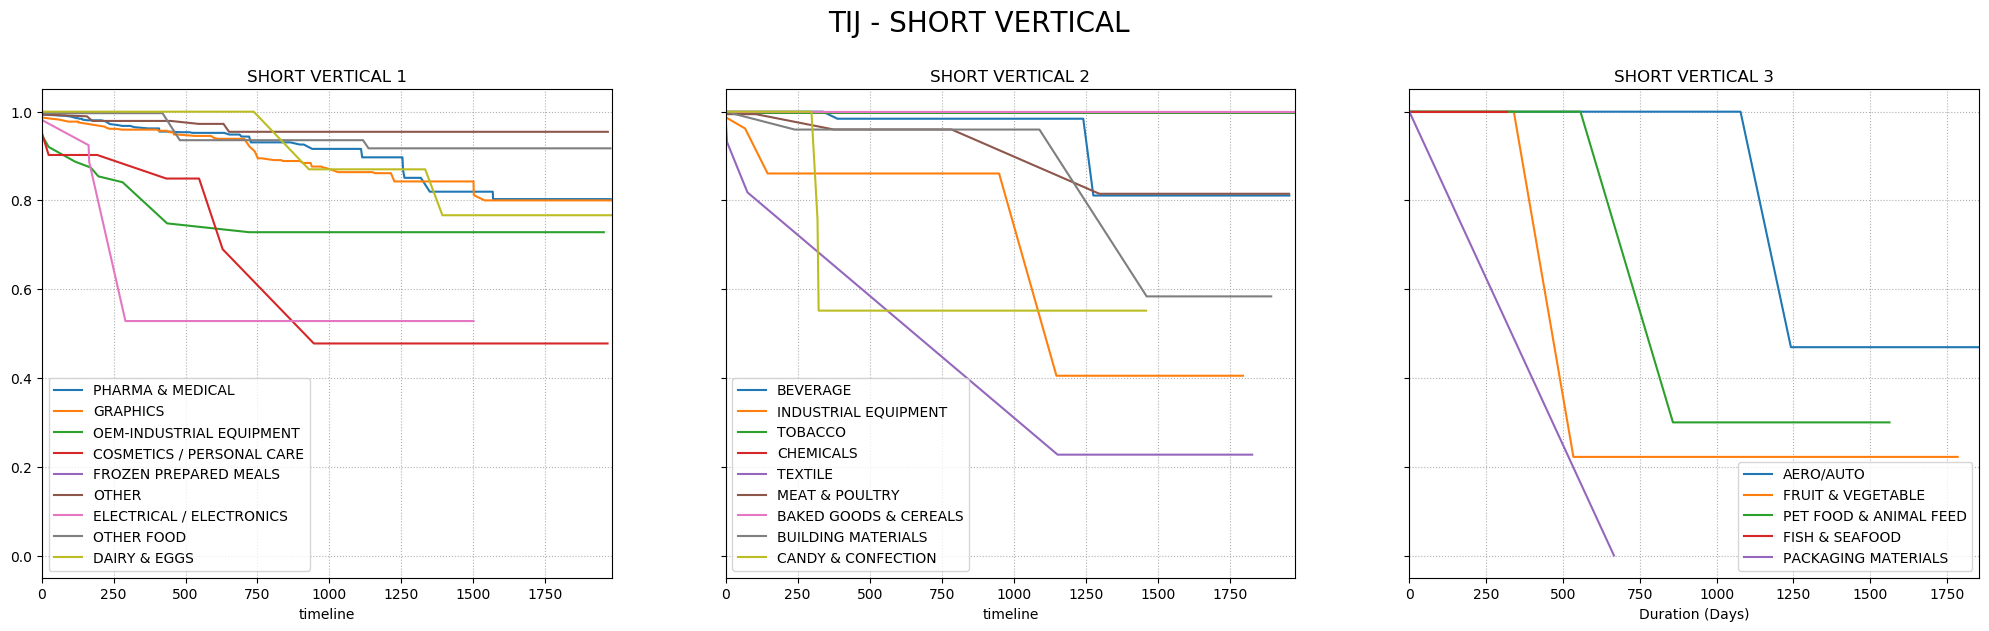

In [97]:
kmf1 = KaplanMeierFitter()

plt.figure(figsize = (25,20))
duration = TIJ_Final_SV['TIJ_Tenure']
observed = TIJ_Final_SV['Churned_BGNBD']



# Set the order that the positions will be plotted
positions_1 = ['PHARMA & MEDICAL', 'GRAPHICS', 'OEM-INDUSTRIAL EQUIPMENT',
       'COSMETICS / PERSONAL CARE', 'FROZEN PREPARED MEALS', 'OTHER',
       'ELECTRICAL / ELECTRONICS', 'OTHER FOOD', 'DAIRY & EGGS']

positions_2 = ['BEVERAGE', 'INDUSTRIAL EQUIPMENT', 'TOBACCO', 'CHEMICALS',
       'TEXTILE', 'MEAT & POULTRY', 'BAKED GOODS & CEREALS',
       'BUILDING MATERIALS', 'CANDY & CONFECTION']

positions_3 = [ 'AERO/AUTO',
       'FRUIT & VEGETABLE', 'PET FOOD & ANIMAL FEED', 'FISH & SEAFOOD',
       'PACKAGING MATERIALS']

ax1 = plt.subplot(331)
ax2 = plt.subplot(332, sharey = ax1)
ax3 = plt.subplot(333,sharey = ax1)
ax1.title.set_text('SHORT VERTICAL 1')
ax2.title.set_text('SHORT VERTICAL 2')
ax3.title.set_text('SHORT VERTICAL 3')


for pos in positions_1:
    
    idx = TIJ_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax1)
    ax1.legend()
    ax1.grid(linestyle='dotted')

    

for pos in positions_2:
    
    idx = TIJ_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax2)
    ax2.legend()
    ax2.grid(linestyle='dotted')


for pos in positions_3:

    idx = TIJ_Final_SV['SHORT_VERTICAL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax3)
    ax3.legend()
    ax3.grid(linestyle='dotted')




plt.suptitle('TIJ - SHORT VERTICAL', fontsize = 20)
plt.subplots_adjust(top=0.94)
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')

plt.style.use('default')
plt.savefig('TIJ SHORT VERTICAL.png', dpi=100)
plt.show()

# SUPPLIES_SEGMENTATION

## CIJ

In [98]:
CIJ_Final_SS = CIJ_Final[CIJ_Final['SUPPLIES_SEGMENTATION']!='Unclass']

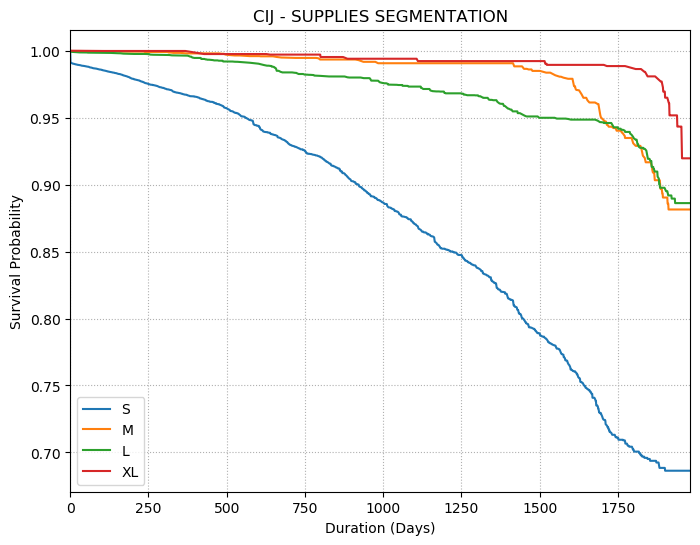

In [99]:
kmf1 = KaplanMeierFitter()
plt.figure(figsize = (8,6))

duration = CIJ_Final_SS['CIJ_Tenure']
observed = CIJ_Final_SS['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = CIJ_Final_SS['SUPPLIES_SEGMENTATION'].unique()

ax = plt.subplot()


for pos in positions:
    
    idx = CIJ_Final_SS['SUPPLIES_SEGMENTATION'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('CIJ - SUPPLIES SEGMENTATION')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## TTO

In [100]:
TTO_Final_SS = TTO_Final[TTO_Final['SUPPLIES_SEGMENTATION']!='Unclass']

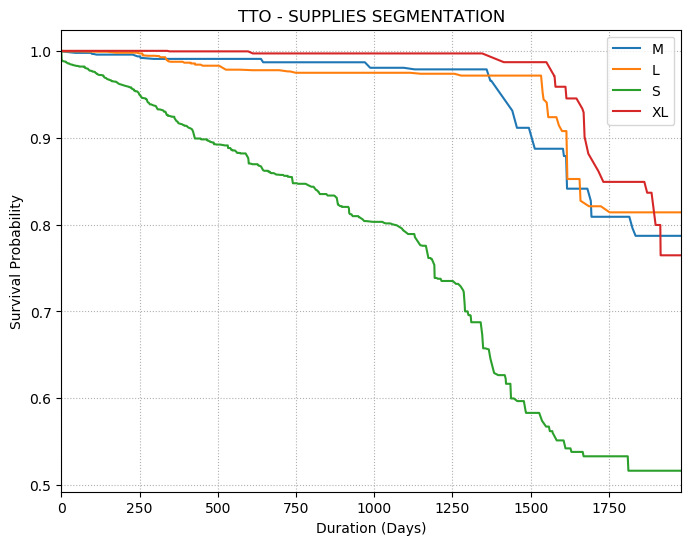

In [101]:
kmf1 = KaplanMeierFitter()
plt.figure(figsize = (8,6))
duration = TTO_Final_SS['TTO_Tenure']
observed = TTO_Final_SS['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TTO_Final_SS['SUPPLIES_SEGMENTATION'].unique()

ax = plt.subplot()


for pos in positions:
    
    idx = TTO_Final_SS['SUPPLIES_SEGMENTATION'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



ax.legend()
plt.title('TTO - SUPPLIES SEGMENTATION')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## LCM

In [102]:
LCM_Final_SS = LCM_Final[LCM_Final['SUPPLIES_SEGMENTATION']!='Unclass']

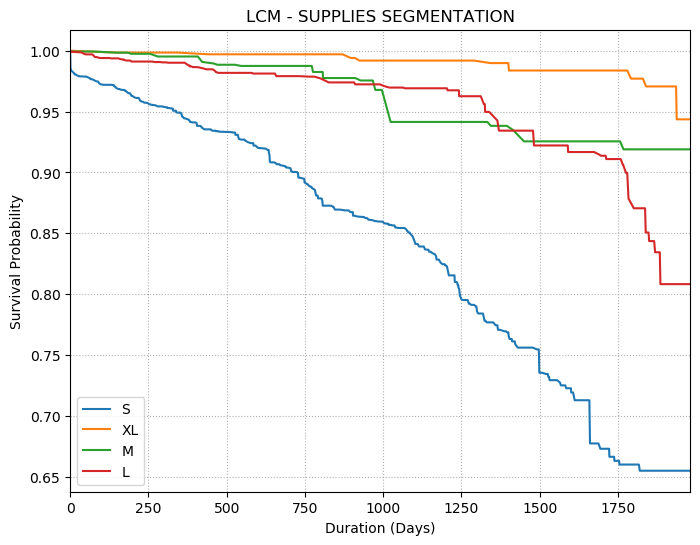

In [103]:
kmf1 = KaplanMeierFitter()
plt.figure(figsize = (8,6))

duration = LCM_Final_SS['LCM_Tenure']
observed = LCM_Final_SS['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = LCM_Final_SS['SUPPLIES_SEGMENTATION'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = LCM_Final_SS['SUPPLIES_SEGMENTATION'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('LCM - SUPPLIES SEGMENTATION')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## TIJ

In [104]:
TIJ_Final_SS = TIJ_Final[TIJ_Final['SUPPLIES_SEGMENTATION']!='Unclass']

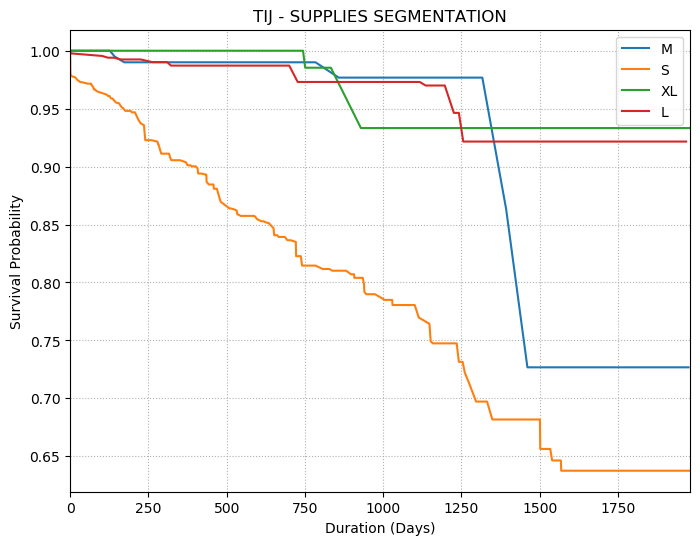

In [105]:
kmf1 = KaplanMeierFitter()
plt.figure(figsize = (8,6))

duration = TIJ_Final_SS['TIJ_Tenure']
observed = TIJ_Final_SS['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TIJ_Final_SS['SUPPLIES_SEGMENTATION'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = TIJ_Final_SS['SUPPLIES_SEGMENTATION'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



ax.legend()
plt.title('TIJ - SUPPLIES SEGMENTATION')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

# Contract Category

## CIJ

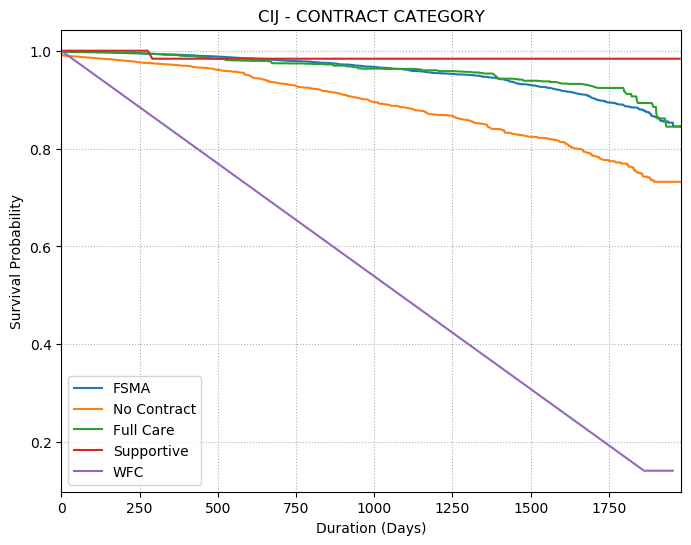

In [106]:
kmf1 = KaplanMeierFitter()
plt.figure(figsize = (8,6))

duration = CIJ_Final['CIJ_Tenure']
observed = CIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = CIJ_Final['Contract_Category'].unique()

ax = plt.subplot()


for pos in positions:
    
    idx = CIJ_Final['Contract_Category'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.legend()
plt.title('CIJ - CONTRACT CATEGORY')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()



## TTO

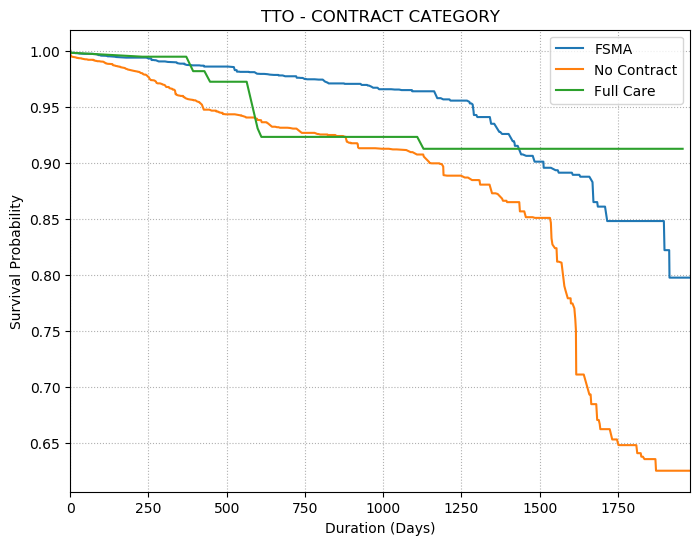

In [107]:
kmf1 = KaplanMeierFitter()
plt.figure(figsize = (8,6))

duration = TTO_Final['TTO_Tenure']
observed = TTO_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TTO_Final['Contract_Category'].unique()

ax = plt.subplot()


for pos in positions:
    
    idx = TTO_Final['Contract_Category'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('TTO - CONTRACT CATEGORY')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## LCM

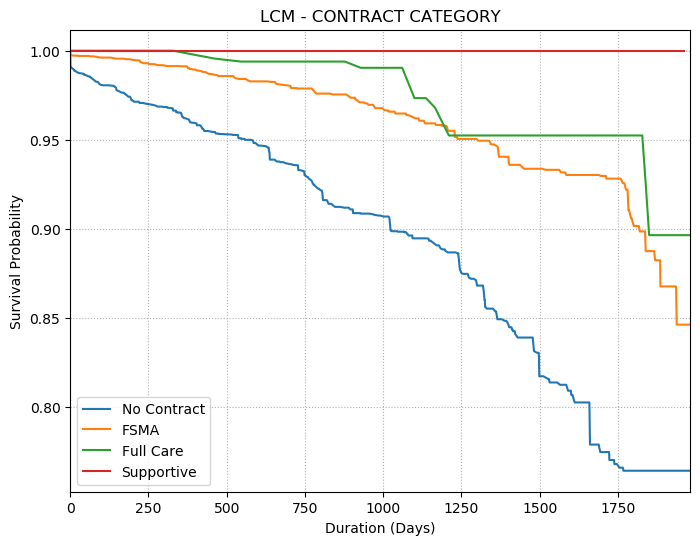

In [108]:
kmf1 = KaplanMeierFitter()
plt.figure(figsize = (8,6))

duration = LCM_Final['LCM_Tenure']
observed = LCM_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = LCM_Final['Contract_Category'].unique()

ax = plt.subplot()


for pos in positions:
    
    idx = LCM_Final['Contract_Category'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



ax.legend()
plt.title('LCM - CONTRACT CATEGORY')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## TIJ

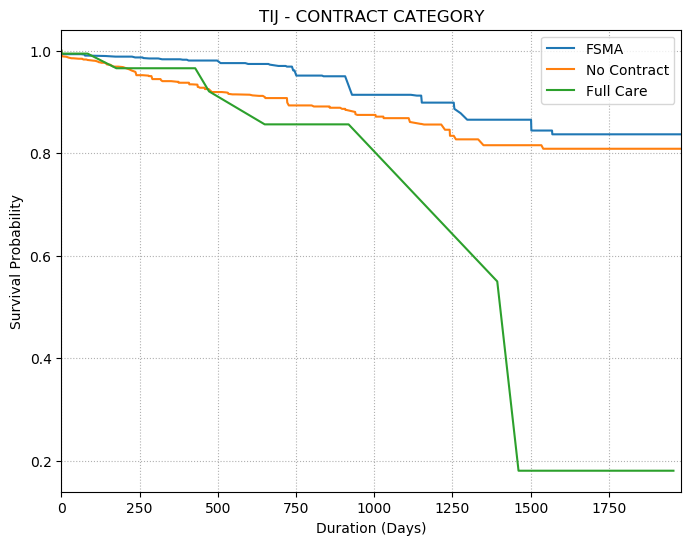

In [109]:
kmf1 = KaplanMeierFitter()
plt.figure(figsize = (8,6))

duration = TIJ_Final['TIJ_Tenure']
observed = TIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TIJ_Final['Contract_Category'].unique()

ax = plt.subplot()


for pos in positions:
    
    idx = TIJ_Final['Contract_Category'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('TIJ - CONTRACT CATEGORY')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

# Strategic Account

## CIJ

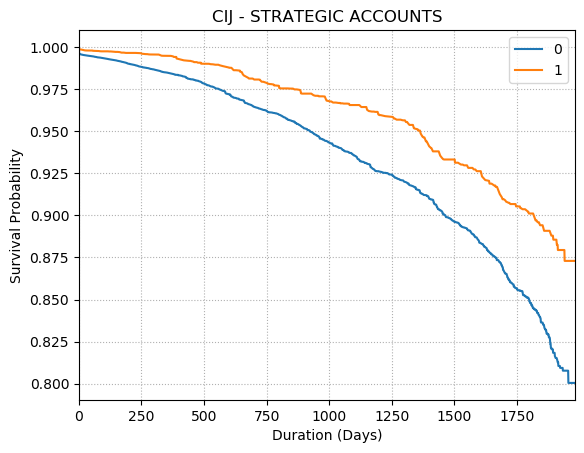

In [110]:
kmf1 = KaplanMeierFitter()

duration = CIJ_Final['CIJ_Tenure']
observed = CIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = CIJ_Final['STRATEGIC_ACCOUNTS'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = CIJ_Final['STRATEGIC_ACCOUNTS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('CIJ - STRATEGIC ACCOUNTS')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## TTO

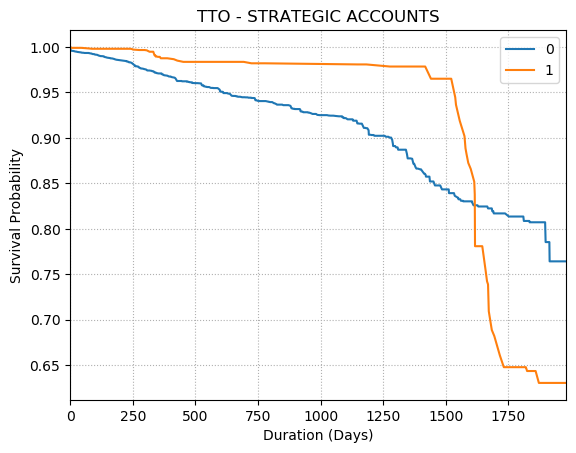

In [111]:
kmf1 = KaplanMeierFitter()

duration = TTO_Final['TTO_Tenure']
observed = TTO_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TTO_Final['STRATEGIC_ACCOUNTS'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = TTO_Final['STRATEGIC_ACCOUNTS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('TTO - STRATEGIC ACCOUNTS')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## LCM

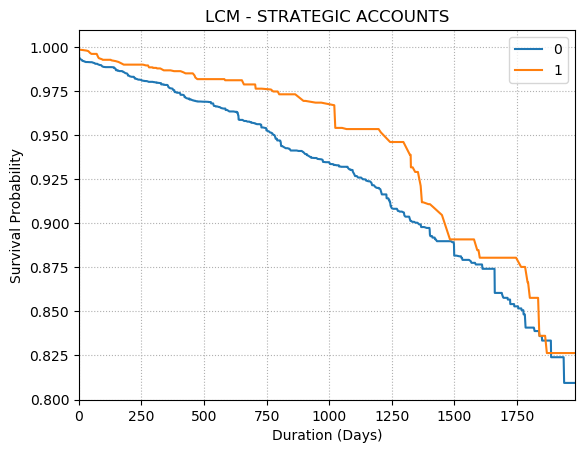

In [112]:
kmf1 = KaplanMeierFitter()

duration = LCM_Final['LCM_Tenure']
observed = LCM_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = LCM_Final['STRATEGIC_ACCOUNTS'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = LCM_Final['STRATEGIC_ACCOUNTS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('LCM - STRATEGIC ACCOUNTS')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## TIJ

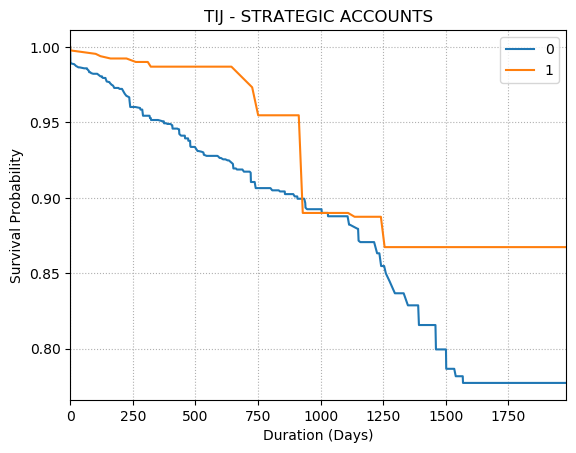

In [113]:
kmf1 = KaplanMeierFitter()

duration = TIJ_Final['TIJ_Tenure']
observed = TIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TIJ_Final['STRATEGIC_ACCOUNTS'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = TIJ_Final['STRATEGIC_ACCOUNTS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('TIJ - STRATEGIC ACCOUNTS')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

# Territory Region

## CIJ

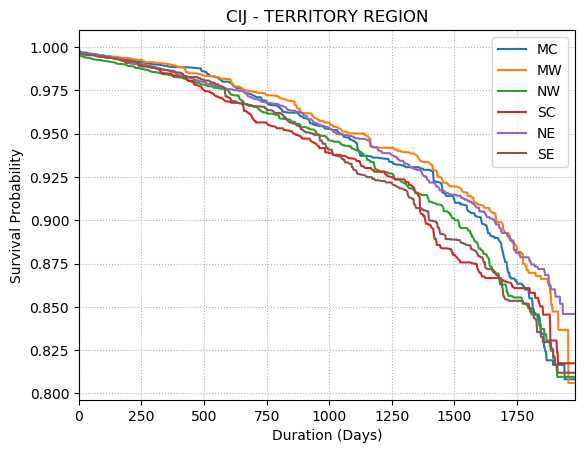

In [114]:
kmf1 = KaplanMeierFitter()

duration = CIJ_Final['CIJ_Tenure']
observed = CIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = CIJ_Final['TERRITORY_REGION'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = CIJ_Final['TERRITORY_REGION'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.legend()
plt.title('CIJ - TERRITORY REGION')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## TTO

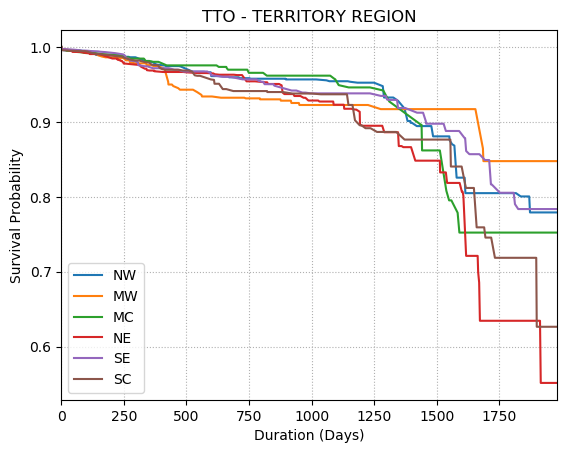

In [115]:
kmf1 = KaplanMeierFitter()

duration = TTO_Final['TTO_Tenure']
observed = TTO_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TTO_Final['TERRITORY_REGION'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = TTO_Final['TERRITORY_REGION'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('TTO - TERRITORY REGION')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## LCM

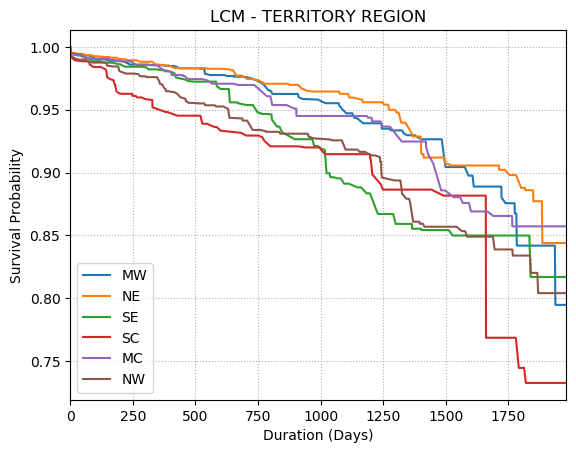

In [116]:
kmf1 = KaplanMeierFitter()

duration = LCM_Final['LCM_Tenure']
observed = LCM_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = LCM_Final['TERRITORY_REGION'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = LCM_Final['TERRITORY_REGION'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('LCM - TERRITORY REGION')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

## TIJ

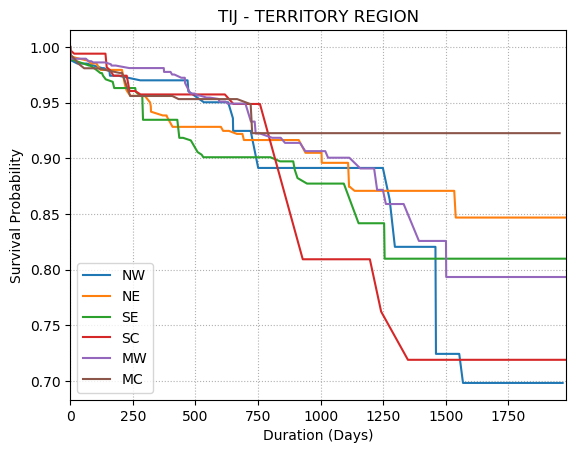

In [117]:
kmf1 = KaplanMeierFitter()

duration = TIJ_Final['TIJ_Tenure']
observed = TIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TIJ_Final['TERRITORY_REGION'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = TIJ_Final['TERRITORY_REGION'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('TIJ - TERRITORY REGION')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()

# Churn

## CIJ

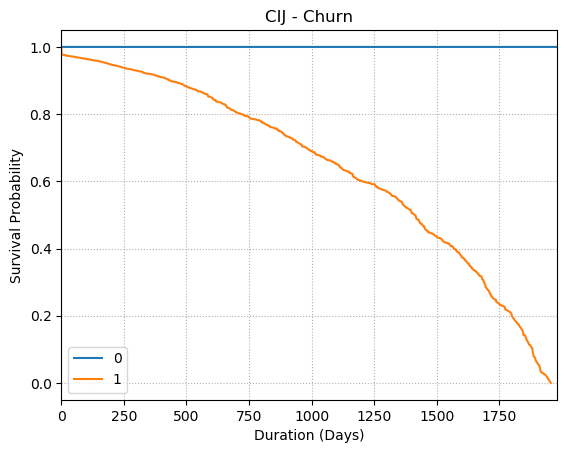

In [118]:
kmf1 = KaplanMeierFitter()

duration = CIJ_Final['CIJ_Tenure']
observed = CIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = CIJ_Final['Churned_BGNBD'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = CIJ_Final['Churned_BGNBD'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('CIJ - Churn')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
ax.legend()
plt.show()

## TTO

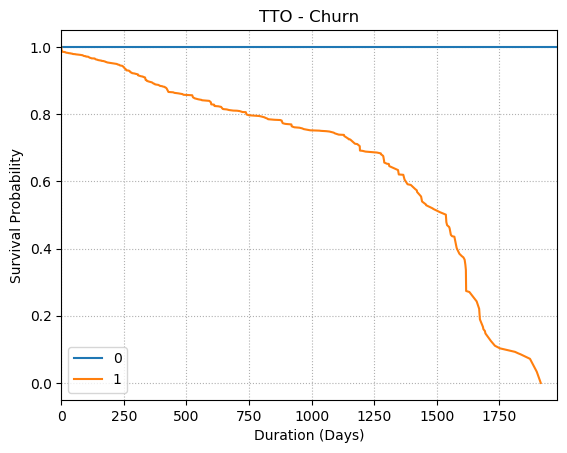

In [119]:
kmf1 = KaplanMeierFitter()

duration = TTO_Final['TTO_Tenure']
observed = TTO_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TTO_Final['Churned_BGNBD'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = TTO_Final['Churned_BGNBD'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('TTO - Churn')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
ax.legend()
plt.show()

## LCM

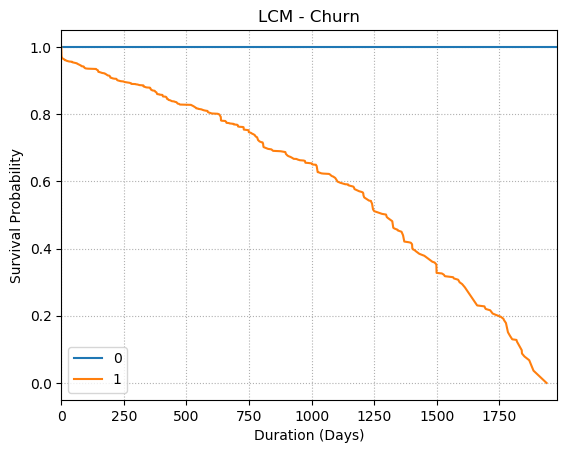

In [120]:
kmf1 = KaplanMeierFitter()

duration = LCM_Final['LCM_Tenure']
observed = LCM_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = LCM_Final['Churned_BGNBD'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = LCM_Final['Churned_BGNBD'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('LCM - Churn')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
ax.legend()
plt.show()

## TIJ

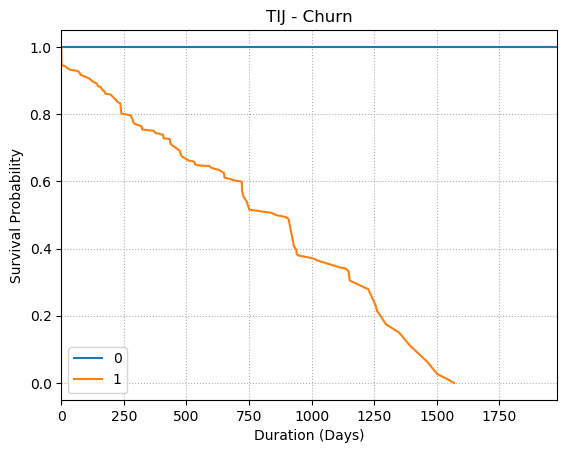

In [121]:
kmf1 = KaplanMeierFitter()

duration = TIJ_Final['TIJ_Tenure']
observed = TIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TIJ_Final['Churned_BGNBD'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = TIJ_Final['Churned_BGNBD'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('TIJ - Churn')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
ax.legend()
plt.show()

# Cluster

In [36]:
CIJ.dropna(inplace = True)
TTO.dropna(inplace = True)
LCM.dropna(inplace = True)
TIJ.dropna(inplace = True)

/Users/andrewchuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/andrewchuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andrewchuang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This i

## CIJ

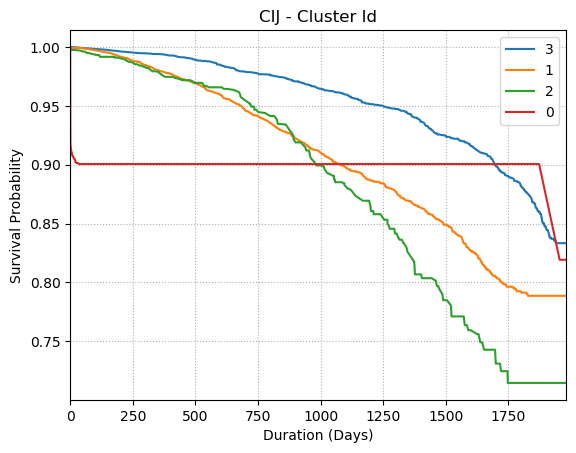

In [122]:
kmf1 = KaplanMeierFitter()

duration = CIJ_Final['CIJ_Tenure']
observed = CIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = CIJ_Final['Cluster_Id'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = CIJ_Final['Cluster_Id'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('CIJ - Cluster Id')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
ax.legend()
plt.show()

## TTO

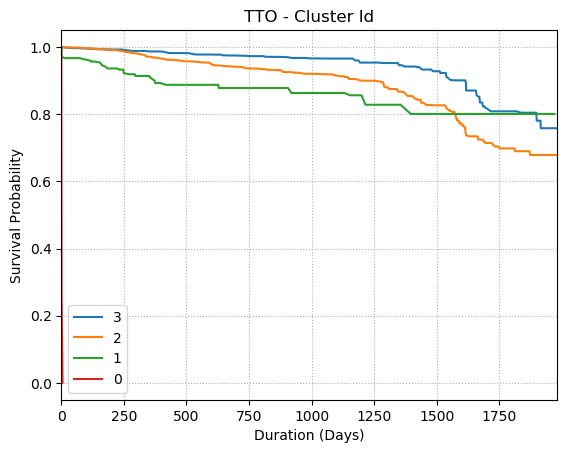

In [123]:
kmf1 = KaplanMeierFitter()

duration = TTO_Final['TTO_Tenure']
observed = TTO_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TTO_Final['Cluster_Id'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = TTO_Final['Cluster_Id'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('TTO - Cluster Id')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
ax.legend()
plt.show()

## LCM

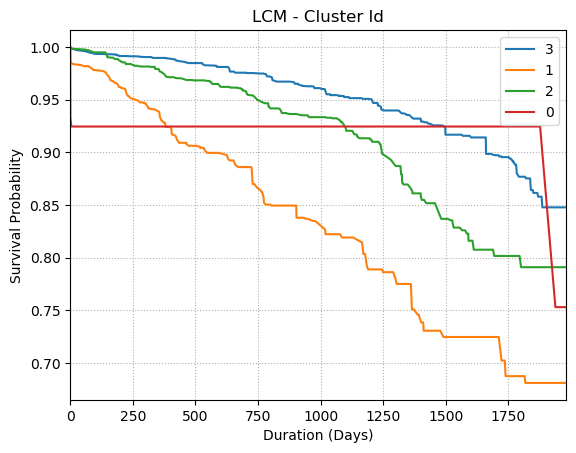

In [124]:
kmf1 = KaplanMeierFitter()

duration = LCM_Final['LCM_Tenure']
observed = LCM_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = LCM_Final['Cluster_Id'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = LCM_Final['Cluster_Id'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('LCM - Cluster Id')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
ax.legend()
plt.show()


## TIJ

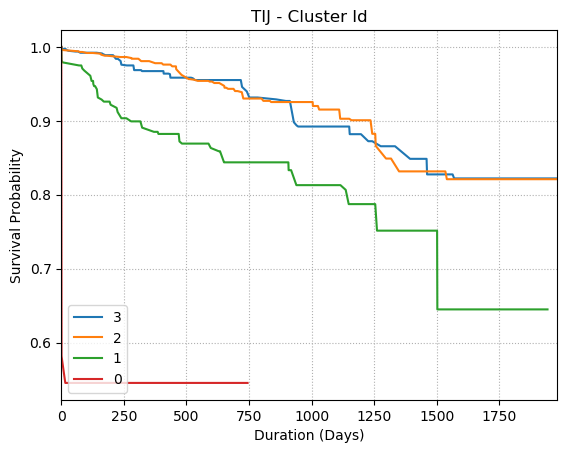

In [127]:
kmf1 = KaplanMeierFitter()

duration = TIJ_Final['TIJ_Tenure']
observed = TIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TIJ_Final['Cluster_Id'].unique()
ax = plt.subplot()


for pos in positions:
    
    idx = TIJ_Final['Cluster_Id'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.title('TIJ - Cluster Id')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
ax.legend(loc = 'lower left')
plt.show()


# SALES_CHANNEL

## CIJ

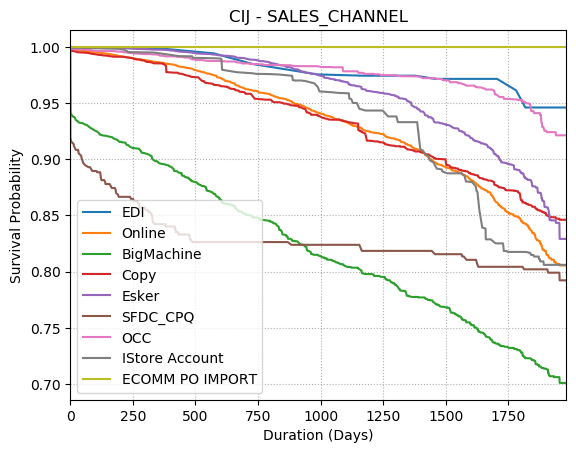

In [128]:
kmf1 = KaplanMeierFitter()

duration = CIJ_Final['CIJ_Tenure']
observed = CIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = CIJ_Final['SALES_CHANNEL'].unique()

ax = plt.subplot()


for pos in positions:
    
    idx = CIJ_Final['SALES_CHANNEL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('CIJ - SALES_CHANNEL')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()


## TTO

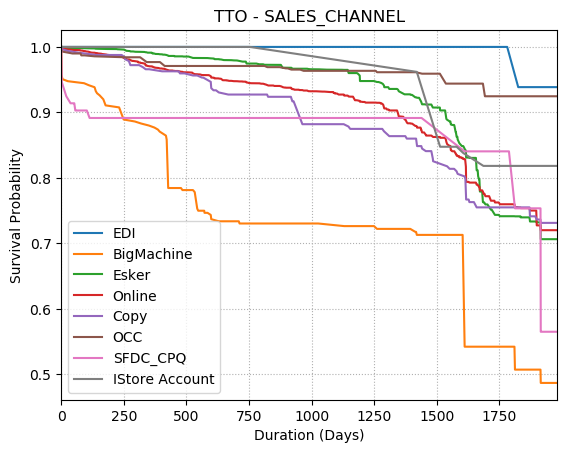

In [129]:
kmf1 = KaplanMeierFitter()

duration = TTO_Final['TTO_Tenure']
observed = TTO_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TTO_Final['SALES_CHANNEL'].unique()

ax = plt.subplot()


for pos in positions:
    
    idx = TTO_Final['SALES_CHANNEL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.legend()
plt.title('TTO - SALES_CHANNEL')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()



## LCM

In [43]:
LCM['SALES_CHANNEL'].value_counts()

Online             16080
Esker               7388
OCC                 1129
BigMachine           654
Copy                 520
EDI                  405
IStore Account       310
SFDC_CPQ             162
ECOMM PO IMPORT        5
Service Billing        1
Name: SALES_CHANNEL, dtype: int64

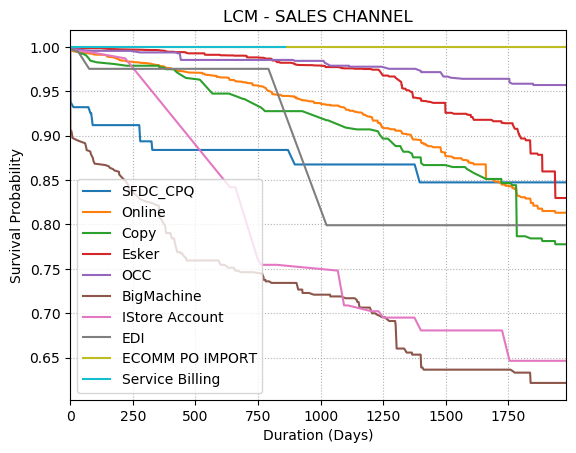

In [130]:
kmf1 = KaplanMeierFitter()

duration = LCM_Final['LCM_Tenure']
observed = LCM_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = LCM_Final['SALES_CHANNEL'].unique()

ax = plt.subplot()


for pos in positions:
    
    idx = LCM_Final['SALES_CHANNEL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.legend()
plt.title('LCM - SALES CHANNEL')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()




## TIJ

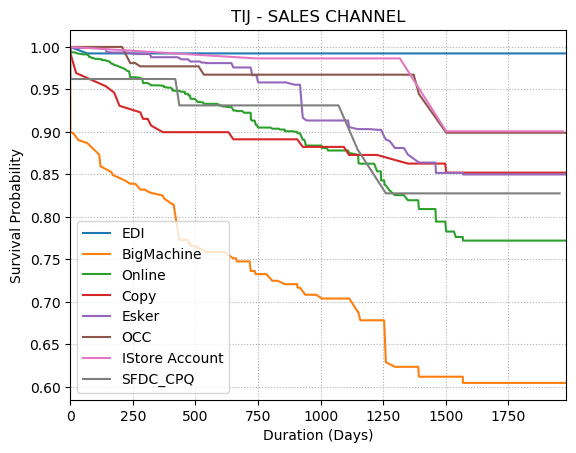

In [131]:
kmf1 = KaplanMeierFitter()

duration = TIJ_Final['TIJ_Tenure']
observed = TIJ_Final['Churned_BGNBD']

# Set the order that the positions will be plotted
positions = TIJ_Final['SALES_CHANNEL'].unique()

ax = plt.subplot()


for pos in positions:
    
    idx = TIJ_Final['SALES_CHANNEL'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ax.legend()
plt.title('TIJ - SALES CHANNEL')
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.grid(linestyle='dotted')
plt.style.use('default')
plt.show()



# SUPPLIES_DECLINE_REASONS

## CIJ

In [132]:
CIJ_Final_SDR = CIJ_Final[CIJ_Final['SUPPLIES_DECLINE_REASONS']!='None']

In [133]:
CIJ_Final_SDR['SUPPLIES_DECLINE_REASONS'].unique()

array(['Migration to 1000 Line/TIJ/TTO/LCM/LPA', 'Over Stocked / Timing',
       'Off Brand', 'Production Down (timing)', 'Site Closed',
       'AP Competitive Displacement', 'Migration to Lasers',
       'Production / Code Reduction', 'Moved Equipment',
       'Recent Regain/Win-back', 'Served by Authorized Distributor',
       'No More Coding Requirement', 'Seasonal Producer', 'Project Based',
       'Printing/EQ downtime Issues', 'VJ Operations Issues',
       'Pricing / Discounting', 'Financial Distress/Credit Hold'],
      dtype=object)

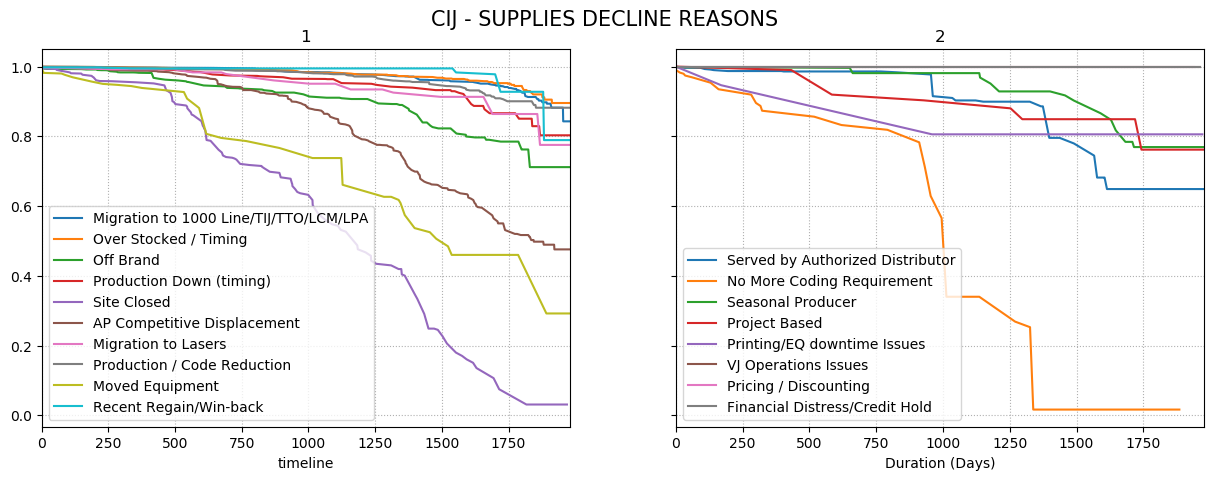

In [134]:
kmf1 = KaplanMeierFitter()

plt.figure(figsize = (15,10))
duration = CIJ_Final_SDR['CIJ_Tenure']
observed = CIJ_Final_SDR['Churned_BGNBD']

# Set the order that the positions will be plotted
positions_1 = ['Migration to 1000 Line/TIJ/TTO/LCM/LPA',
       'Over Stocked / Timing', 'Off Brand', 'Production Down (timing)',
       'Site Closed', 'AP Competitive Displacement',
       'Migration to Lasers', 'Production / Code Reduction',
       'Moved Equipment', 'Recent Regain/Win-back']

positions_2 = ['Served by Authorized Distributor', 'No More Coding Requirement',
       'Seasonal Producer', 'Project Based',
       'Printing/EQ downtime Issues', 'VJ Operations Issues',
       'Pricing / Discounting', 'Financial Distress/Credit Hold']

ax1 = plt.subplot(221)
ax2 = plt.subplot(222, sharey = ax1)

ax1.title.set_text('1')
ax2.title.set_text('2')



for pos in positions_1:
    
    idx = CIJ_Final_SDR['SUPPLIES_DECLINE_REASONS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax1)
    ax1.grid(linestyle='dotted')
    ax1.legend()

    
for pos in positions_2:
    
    idx = CIJ_Final_SDR['SUPPLIES_DECLINE_REASONS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax2)
    ax2.grid(linestyle='dotted')
    ax2.legend()


plt.suptitle('CIJ - SUPPLIES DECLINE REASONS', fontsize = 15)
plt.subplots_adjust(top=0.94)
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.style.use('default')
plt.show()

## TTO

In [135]:
TTO_Final_SDR = TTO_Final[TTO_Final['SUPPLIES_DECLINE_REASONS']!='None']

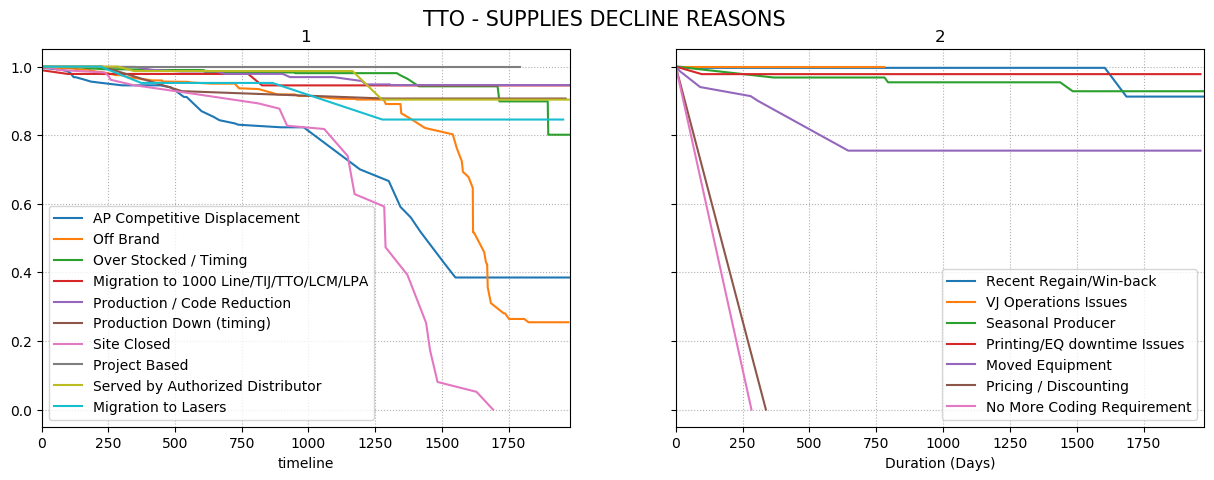

In [136]:
kmf1 = KaplanMeierFitter()

plt.figure(figsize = (15,10))
duration = TTO_Final_SDR['TTO_Tenure']
observed = TTO_Final_SDR['Churned_BGNBD']

# Set the order that the positions will be plotted
positions_1 = ['AP Competitive Displacement', 'Off Brand',
       'Over Stocked / Timing', 'Migration to 1000 Line/TIJ/TTO/LCM/LPA',
       'Production / Code Reduction', 'Production Down (timing)',
       'Site Closed', 'Project Based', 'Served by Authorized Distributor',
       'Migration to Lasers']

positions_2 = ['Recent Regain/Win-back',
       'VJ Operations Issues', 'Seasonal Producer',
       'Printing/EQ downtime Issues', 'Moved Equipment',
       'Pricing / Discounting', 'No More Coding Requirement']

ax1 = plt.subplot(221)
ax2 = plt.subplot(222, sharey = ax1)

ax1.title.set_text('1')
ax2.title.set_text('2')



for pos in positions_1:
    
    idx = TTO_Final_SDR['SUPPLIES_DECLINE_REASONS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax1)
    ax1.grid(linestyle='dotted')
    ax1.legend()

    
for pos in positions_2:
    
    idx = TTO_Final_SDR['SUPPLIES_DECLINE_REASONS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax2)
    ax2.grid(linestyle='dotted')
    ax2.legend()


plt.suptitle('TTO - SUPPLIES DECLINE REASONS', fontsize = 15)
plt.subplots_adjust(top=0.94)
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.style.use('default')
plt.show()

## LCM

In [137]:
LCM_Final_SDR = LCM_Final[LCM_Final['SUPPLIES_DECLINE_REASONS']!='None']

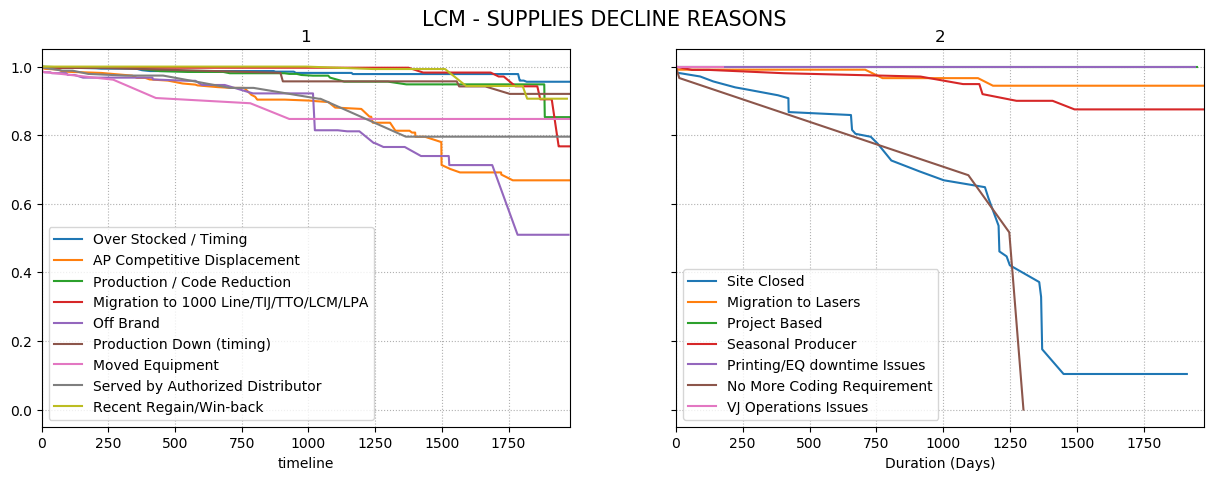

In [138]:
kmf1 = KaplanMeierFitter()

plt.figure(figsize = (15,10))
duration = LCM_Final_SDR['LCM_Tenure']
observed = LCM_Final_SDR['Churned_BGNBD']

# Set the order that the positions will be plotted
positions_1 = ['Over Stocked / Timing', 'AP Competitive Displacement',
       'Production / Code Reduction',
       'Migration to 1000 Line/TIJ/TTO/LCM/LPA', 'Off Brand',
       'Production Down (timing)', 'Moved Equipment',
       'Served by Authorized Distributor', 'Recent Regain/Win-back']

positions_2 = ['Site Closed', 'Migration to Lasers', 'Project Based',
       'Seasonal Producer', 'Printing/EQ downtime Issues',
       'No More Coding Requirement', 'VJ Operations Issues']

ax1 = plt.subplot(221)
ax2 = plt.subplot(222, sharey = ax1)

ax1.title.set_text('1')
ax2.title.set_text('2')



for pos in positions_1:
    
    idx = LCM_Final_SDR['SUPPLIES_DECLINE_REASONS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax1)
    ax1.grid(linestyle='dotted')
    ax1.legend()

    
for pos in positions_2:
    
    idx = LCM_Final_SDR['SUPPLIES_DECLINE_REASONS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax2)
    ax2.grid(linestyle='dotted')
    ax2.legend()


plt.suptitle('LCM - SUPPLIES DECLINE REASONS', fontsize = 15)
plt.subplots_adjust(top=0.94)
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.style.use('default')
plt.show()

## TIJ

In [139]:
TIJ_Final_SDR = TIJ_Final[TIJ_Final['SUPPLIES_DECLINE_REASONS']!='None']

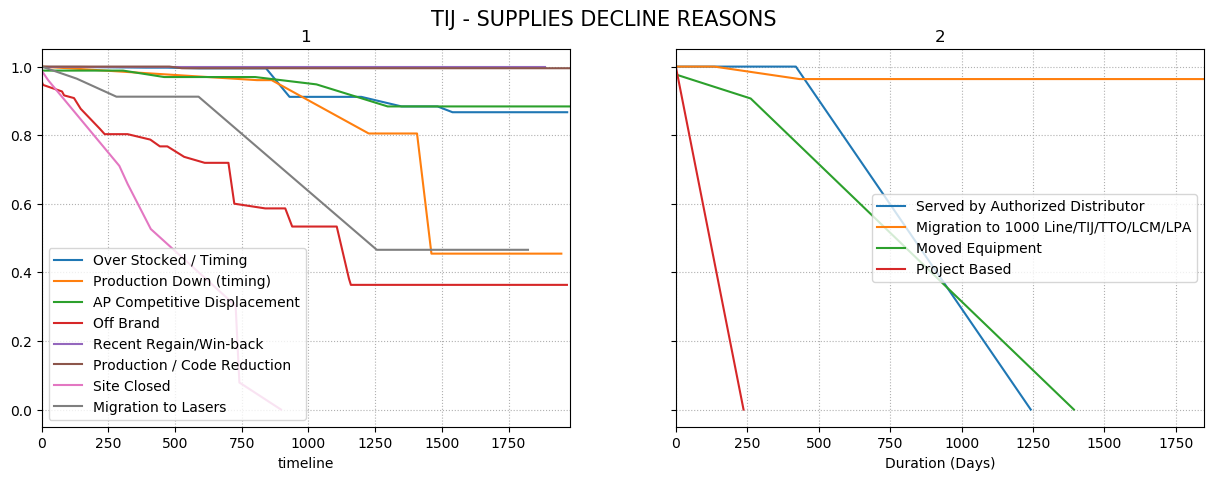

In [140]:
kmf1 = KaplanMeierFitter()

plt.figure(figsize = (15,10))
duration = TIJ_Final_SDR['TIJ_Tenure']
observed = TIJ_Final_SDR['Churned_BGNBD']

# Set the order that the positions will be plotted
positions_1 = ['Over Stocked / Timing', 'Production Down (timing)',
       'AP Competitive Displacement', 'Off Brand',
       'Recent Regain/Win-back', 'Production / Code Reduction',
       'Site Closed', 'Migration to Lasers']

positions_2 = ['Served by Authorized Distributor',
       'Migration to 1000 Line/TIJ/TTO/LCM/LPA', 'Moved Equipment',
       'Project Based']

ax1 = plt.subplot(221)
ax2 = plt.subplot(222, sharey = ax1)

ax1.title.set_text('1')
ax2.title.set_text('2')



for pos in positions_1:
    
    idx = TIJ_Final_SDR['SUPPLIES_DECLINE_REASONS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax1)
    ax1.grid(linestyle='dotted')
    ax1.legend()

    
for pos in positions_2:
    
    idx = TIJ_Final_SDR['SUPPLIES_DECLINE_REASONS'] == pos
   
    kmf1.fit(duration[idx], observed[idx], label = pos)
    
    kmf1.survival_function_.plot(ax=ax2)
    ax2.grid(linestyle='dotted')
    ax2.legend()


plt.suptitle('TIJ - SUPPLIES DECLINE REASONS', fontsize = 15)
plt.subplots_adjust(top=0.94)
plt.xlabel('Duration (Days)')
plt.ylabel('Survival Probability')
plt.style.use('default')
plt.show()